<a href="https://colab.research.google.com/github/aakashr21/Financial-Risk-Analysis-Model/blob/main/Financial_Risk_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Financial Risk Detection

##### **Project Type**    - Classification
##### **Name**  - Aakash R

## Problem statement - To predict loan defaulter


## Import Libraries

In [1]:
# Import libraries for data wrangling
import numpy as np
import pandas as pd

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Adjusting view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

## Dataset Loading

In [3]:
# loading dataset
app_df = pd.read_csv('/content/drive/MyDrive/Project/application_data.csv')
prev_app_df = pd.read_csv('/content/drive/MyDrive/Project/previous_application.csv')
column_des = pd.read_csv('/content/drive/MyDrive/Project/columns_description - columns_description.csv')


## Dataset view

In [4]:
# description of each columns in application and previous application dataset
column_des = column_des[['Table', 'Row', 'Description', 'Special']]
column_des

Table                           Row  \
0            application_data                    SK_ID_CURR   
1            application_data                        TARGET   
2            application_data            NAME_CONTRACT_TYPE   
3            application_data                   CODE_GENDER   
4            application_data                  FLAG_OWN_CAR   
5            application_data               FLAG_OWN_REALTY   
6            application_data                  CNT_CHILDREN   
7            application_data              AMT_INCOME_TOTAL   
8            application_data                    AMT_CREDIT   
9            application_data                   AMT_ANNUITY   
10           application_data               AMT_GOODS_PRICE   
11           application_data               NAME_TYPE_SUITE   
12           application_data              NAME_INCOME_TYPE   
13           application_data           NAME_EDUCATION_TYPE   
14           application_data            NAME_FAMILY_STATUS   
15           application_data             NAME_HOUSING_TYPE   
16           application_data    REGION_POPULATION_RELATIVE   
17           application_data                    DAYS_BIRTH   
18           application_data                 DAYS_EMPLOYED   
19           application_data             DAYS_REGISTRATION   
20           application_data               DAYS_ID_PUBLISH   
21           application_data                   OWN_CAR_AGE   
22           application_data                    FLAG_MOBIL   
23           application_data                FLAG_EMP_PHONE   
24           application_data               FLAG_WORK_PHONE   
25           application_data              FLAG_CONT_MOBILE   
26           application_data                    FLAG_PHONE   
27           application_data                    FLAG_EMAIL   
28           application_data               OCCUPATION_TYPE   
29           application_data               CNT_FAM_MEMBERS   
30           application_data          REGION_RATING_CLIENT   
31           application_data   REGION_RATING_CLIENT_W_CITY   
32           application_data    WEEKDAY_APPR_PROCESS_START   
33           application_data       HOUR_APPR_PROCESS_START   
34           application_data    REG_REGION_NOT_LIVE_REGION   
35           application_data    REG_REGION_NOT_WORK_REGION   
36           application_data   LIVE_REGION_NOT_WORK_REGION   
37           application_data        REG_CITY_NOT_LIVE_CITY   
38           application_data        REG_CITY_NOT_WORK_CITY   
39           application_data       LIVE_CITY_NOT_WORK_CITY   
40           application_data             ORGANIZATION_TYPE   
41           application_data                  EXT_SOURCE_1   
42           application_data                  EXT_SOURCE_2   
43           application_data                  EXT_SOURCE_3   
44           application_data                APARTMENTS_AVG   
45           application_data              BASEMENTAREA_AVG   
46           application_data   YEARS_BEGINEXPLUATATION_AVG   
47           application_data               YEARS_BUILD_AVG   
48           application_data                COMMONAREA_AVG   
49           application_data                 ELEVATORS_AVG   
50           application_data                 ENTRANCES_AVG   
51           application_data                 FLOORSMAX_AVG   
52           application_data                 FLOORSMIN_AVG   
53           application_data                  LANDAREA_AVG   
54           application_data          LIVINGAPARTMENTS_AVG   
55           application_data                LIVINGAREA_AVG   
56           application_data       NONLIVINGAPARTMENTS_AVG   
57           application_data             NONLIVINGAREA_AVG   
58           application_data               APARTMENTS_MODE   
59           application_data             BASEMENTAREA_MODE   
60           application_data  YEARS_BEGINEXPLUATATION_MODE   
61           application_data              YEARS_BUILD_MODE   
62           application_data               COMMONAREA_

**About column description dataframe**

**Table:** Shows in which table the column is present

**Row:** Column name

**Description:** Information about the column

**Special:** Specail feature of column


In [5]:
# view of application dataset
app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           100002       1         Cash loans           M            N               Y   
1           100003       0         Cash loans           F            N               N   
2           100004       0    Revolving loans           M            Y               Y   
3           100006       0         Cash loans           F            N               Y   
4           100007       0         Cash loans           M            N               Y   
...            ...     ...                ...         ...          ...             ...   
307506      456251       0         Cash loans           M            N               N   
307507      456252       0         Cash loans           F            N               Y   
307508      456253       0         Cash loans           F            N               Y   
307509      456254       1         Cash loans           F            N               Y   
307510      456255       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0                  0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1                  0          270000.0   1293502.5      35698.5        1129500.0          Family   
2                  0           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3                  0          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4                  0          121500.0    513000.0      21865.5         513000.0   Unaccompanied   
...              ...               ...         ...          ...              ...             ...   
307506             0          157500.0    254700.0      27558.0         225000.0   Unaccompanied   
307507             0           72000.0    269550.0      12001.5         225000.0   Unaccompanied   
307508             0          153000.0    677664.0      29979.0         585000.0   Unaccompanied   
307509             0          171000.0    370107.0      20205.0         319500.0   Unaccompanied   
307510             0          157500.0    675000.0      49117.5         675000.0   Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                    Working  Secondary / secondary special  Single / not married   
1              State servant               Higher education               Married   
2                    Working  Secondary / secondary special  Single / not married   
3                    Working  Secondary / secondary special        Civil marriage   
4                    Working  Secondary / secondary special  Single / not married   
...                      ...                            ...                   ...   
307506               Working  Secondary / secondary special             Separated   
307507             Pensioner  Secondary / secondary special                 Widow   
307508               Working               Higher education             Separated   
307509  Commercial associate  Secondary / secondary special               Married   
307510  Commercial associate               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       House / apartment                    0.018801       -9461           -637   
1       House / apartment                    0.003541      -16765          -1188   
2       House / apartment                    0.010032      -19046           -225   
3       House / apartment                    0.008019      -19005          -3039   
4       House / apartment                    0.028663      -19932          -3038   
...                   ...                         ...         ...            ...   
307506       With parents                    0.032561       -9327           -236   
307507  House / apartment        

In [6]:
# view of previous application dataset
prev_app_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     Consumer loans     1730.430          17145.0     17145.0   
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0   
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5   
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0   
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0   
...             ...         ...                ...          ...              ...         ...   
1670209     2300464      352015     Consumer loans    14704.290         267295.5    311400.0   
1670210     2357031      334635     Consumer loans     6622.020          87750.0     64291.5   
1670211     2659632      249544     Consumer loans    11520.855         105237.0    102523.5   
1670212     2785582      400317         Cash loans    18821.520         180000.0    191880.0   
1670213     2418762      261212         Cash loans    16431.300         360000.0    360000.0   

         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                     0.0          17145.0                   SATURDAY                       15   
1                     NaN         607500.0                   THURSDAY                       11   
2                     NaN         112500.0                    TUESDAY                       11   
3                     NaN         450000.0                     MONDAY                        7   
4                     NaN         337500.0                   THURSDAY                        9   
...                   ...              ...                        ...                      ...   
1670209               0.0         267295.5                  WEDNESDAY                       12   
1670210           29250.0          87750.0                    TUESDAY                       15   
1670211           10525.5         105237.0                     MONDAY                       12   
1670212               NaN         180000.0                  WEDNESDAY                        9   
1670213               NaN         360000.0                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                                 Y                       1           0.000000   
1                                 Y                       1                NaN   
2                                 Y                       1                NaN   
3                                 Y                       1                NaN   
4                                 Y                       1                NaN   
...                             ...                     ...                ...   
1670209                           Y                       1           0.000000   
1670210                           Y                       1           0.340554   
1670211                           Y                       1           0.101401   
1670212                           Y                       1                NaN   
1670213                           Y                       1                NaN   

         RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0                     0.182832                  0.867336                    XAP   
1                          NaN                       NaN                    XNA   
2                          NaN                       NaN                    XNA   
3                          NaN                       NaN                    XNA   
4                          NaN                       NaN                Repairs   
...                        ...                       ...                    ...   
1670209                    NaN                       NaN                    XAP   
1670210                    NaN

### Dataset Rows & Columns count

In [7]:
# application dataset Rows & Columns count
print("Dimension of application dataset",app_df.shape)
print("Dimension of previous application dataset",prev_app_df.shape)

Dimension of application dataset (307511, 122)
Dimension of previous application dataset (1670214, 37)


### Dataset information

In [8]:
# data info of application dataset
app_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
# data info of previous application dataset
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
column_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        160 non-null    object
 1   Row          160 non-null    object
 2   Description  160 non-null    object
 3   Special      69 non-null     object
dtypes: object(4)
memory usage: 5.1+ KB


### Duplicate values

In [11]:
# checking for duplicate values in application dataset
app_df.duplicated().sum()

0

In [12]:
# checking for duplicated values in previous application dataset
prev_app_df.duplicated().sum()

0

In [13]:
# application dataset describe
app_df.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count   307511.000000  307511.000000             307511      307511       307511          307511   
unique            NaN            NaN                  2           3            2               2   
top               NaN            NaN         Cash loans           F            N               Y   
freq              NaN            NaN             278232      202448       202924          213312   
mean    278180.518577       0.080729                NaN         NaN          NaN             NaN   
std     102790.175348       0.272419                NaN         NaN          NaN             NaN   
min     100002.000000       0.000000                NaN         NaN          NaN             NaN   
25%     189145.500000       0.000000                NaN         NaN          NaN             NaN   
50%     278202.000000       0.000000                NaN         NaN          NaN             NaN   
75%     367142.500000       0.000000                NaN         NaN          NaN             NaN   
max     456255.000000       1.000000                NaN         NaN          NaN             NaN   

         CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count   307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
unique            NaN               NaN           NaN            NaN              NaN   
top               NaN               NaN           NaN            NaN              NaN   
freq              NaN               NaN           NaN            NaN              NaN   
mean         0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std          0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min          0.000000      2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%          0.000000      1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%          0.000000      1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%          1.000000      2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max         19.000000      1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count           306219           307511                         307511             307511   
unique               7                8                              5                  6   
top      Unaccompanied          Working  Secondary / secondary special            Married   
freq            248526           158774                         218391             196432   
mean               NaN              NaN                            NaN                NaN   
std                NaN              NaN                            NaN                NaN   
min                NaN              NaN                            NaN                NaN   
25%                NaN              NaN                            NaN                NaN   
50%                NaN              NaN                            NaN                NaN   
75%                NaN              NaN                            NaN                NaN   
max                NaN              NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count              307511               307511.000000  307511.000000  307511.000000   
unique                  6                         NaN            NaN            NaN   
top     House / apartment                         NaN            NaN            NaN   
freq               272868                         NaN            NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   63815.045904   
std                   NaN                    0.013831    4363.988632  141275.766519   
min            

In [14]:
# previous application dataset describe
prev_app_df.describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  AMT_APPLICATION  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06     1.670214e+06   
unique           NaN           NaN                  4           NaN              NaN   
top              NaN           NaN         Cash loans           NaN              NaN   
freq             NaN           NaN             747553           NaN              NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04     1.752339e+05   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04     2.927798e+05   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00     0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03     1.872000e+04   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04     7.104600e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04     1.803600e+05   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05     6.905160e+06   

          AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
count   1.670213e+06      7.743700e+05     1.284699e+06                    1670214   
unique           NaN               NaN              NaN                          7   
top              NaN               NaN              NaN                    TUESDAY   
freq             NaN               NaN              NaN                     255118   
mean    1.961140e+05      6.697402e+03     2.278473e+05                        NaN   
std     3.185746e+05      2.092150e+04     3.153966e+05                        NaN   
min     0.000000e+00     -9.000000e-01     0.000000e+00                        NaN   
25%     2.416050e+04      0.000000e+00     5.084100e+04                        NaN   
50%     8.054100e+04      1.638000e+03     1.123200e+05                        NaN   
75%     2.164185e+05      7.740000e+03     2.340000e+05                        NaN   
max     6.905160e+06      3.060045e+06     6.905160e+06                        NaN   

        HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
count              1.670214e+06                     1670214            1.670214e+06   
unique                      NaN                           2                     NaN   
top                         NaN                           Y                     NaN   
freq                        NaN                     1661739                     NaN   
mean               1.248418e+01                         NaN            9.964675e-01   
std                3.334028e+00                         NaN            5.932963e-02   
min                0.000000e+00                         NaN            0.000000e+00   
25%                1.000000e+01                         NaN            1.000000e+00   
50%                1.200000e+01                         NaN            1.000000e+00   
75%                1.500000e+01                         NaN            1.000000e+00   
max                2.300000e+01                         NaN            1.000000e+00   

        RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
count       774370.000000            5951.000000               5951.000000                1670214   
unique                NaN                    NaN                       NaN                     25   
top                   NaN                    NaN                       NaN                    XAP   
freq                  NaN                    NaN                       NaN                 922661   
mean             0.079637               0.188357                  0.773503                    NaN   
std              0.107823               0.087671                  0.100879                    NaN   
min             -0.000015               0.034781                  0.373150                    NaN   
25%              0.000000               0.160716                  0

### Missing values

In [15]:
# checking for missing values in application dataset
app_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

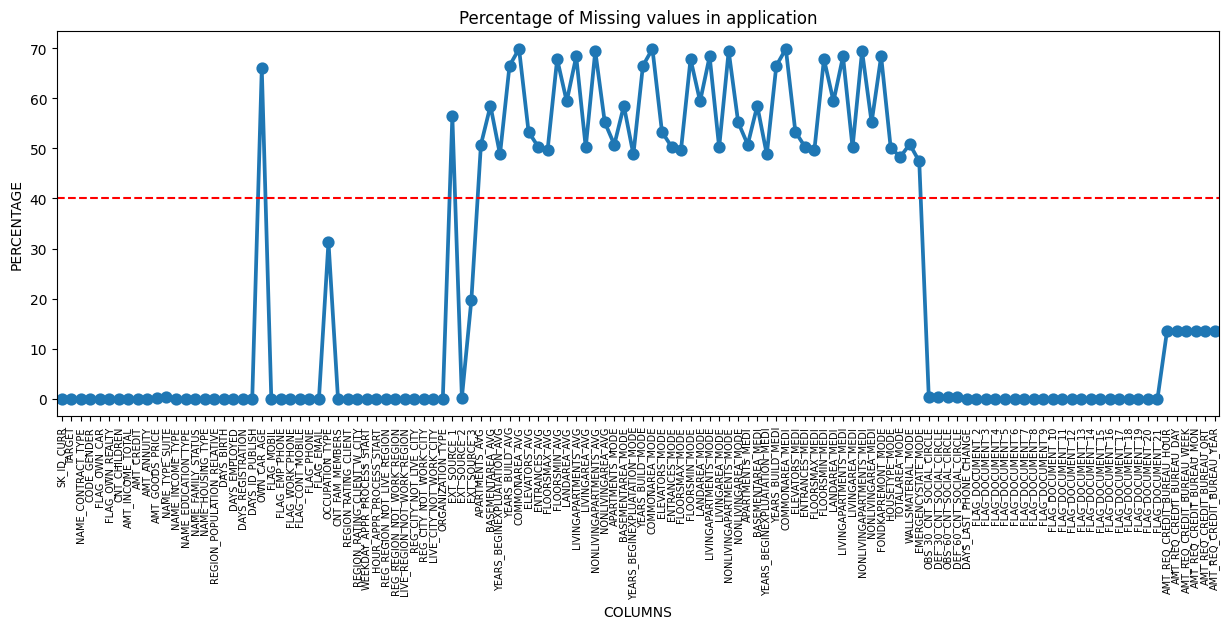

In [16]:
# visualizing missing values in percentage columnwise
# creating dataframe of missing percentage of each column of application
miss_pct_app = pd.DataFrame(app_df.isnull().sum().reset_index())
miss_pct_app.rename(columns={'index':'column', 0:'count'}, inplace = True)
miss_pct_app['pct'] = (miss_pct_app['count']/app_df.shape[0])*100


# visualising using point plot
plt.figure(figsize=(15,5))
sns.pointplot(data=miss_pct_app,x='column',y='pct')
plt.axhline(y=40, color='r', linestyle='--')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [17]:
# checking missing values in previous application
prev_app_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

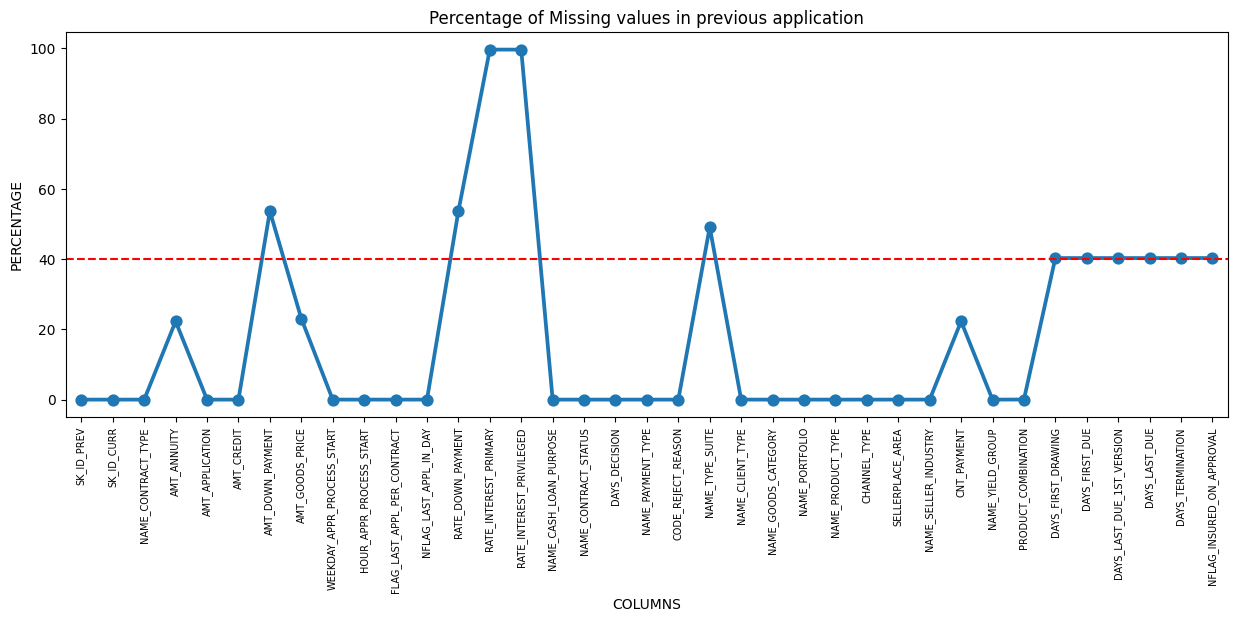

In [18]:
# visualizing missing values in percentage columnwise for previous application
# creating dataframe of missing percentage of each column of previous application
miss_pct_prev_app = pd.DataFrame(prev_app_df.isnull().sum().reset_index())
miss_pct_prev_app.rename(columns={'index':'column', 0:'count'}, inplace = True)
miss_pct_prev_app['pct'] = (miss_pct_prev_app['count']/prev_app_df.shape[0])*100


# visualising using point plot
plt.figure(figsize=(15,5))
sns.pointplot(data=miss_pct_prev_app, x='column', y='pct')
plt.axhline(y=40, color='r', linestyle='--')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

### Handling missing values

**Handling missing values in application dataset**

In [19]:
# dropping columns with more than 40% missing values
miss_app = miss_pct_app[miss_pct_app['pct']>40]['column'].tolist()
rmv_app_df = app_df.drop(labels=miss_app, axis=1)
print("Shape before removing column which more than 40% missing values :",app_df.shape)
print("Shape before removing column which more than 40% missing values :",rmv_app_df.shape)

Shape before removing column which more than 40% missing values : (307511, 122)
Shape before removing column which more than 40% missing values : (307511, 73)


**AMT_ANNUITY COLUMN**

In [20]:
# AMT_ANNUITY column
rmv_app_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

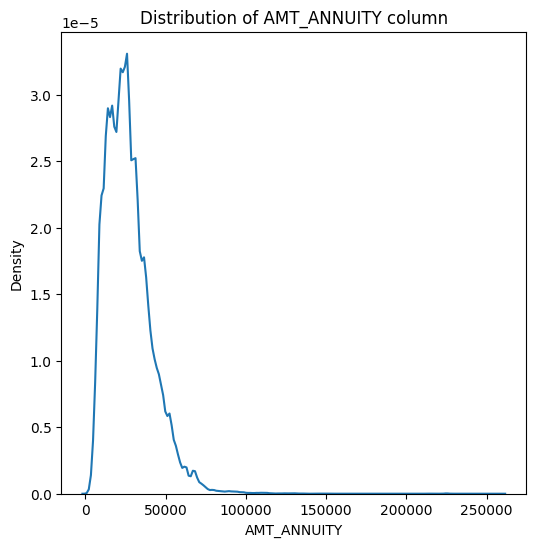

In [21]:
# distribution of AMT_ANNUITY column
plt.figure(figsize=(6,6))
sns.kdeplot(rmv_app_df['AMT_ANNUITY'])
plt.title("Distribution of AMT_ANNUITY column")
plt.show()

The AMT_ANNUITY is right skewed so filling missing values with median.

In [22]:
# filling missing values in AMT_ANNUITY column with median
rmv_app_df['AMT_ANNUITY'] = rmv_app_df['AMT_ANNUITY'].fillna(rmv_app_df['AMT_ANNUITY'].median())

**AMT_GOODS_PRICE COLUMN**

In [23]:
# AMT_GOODS_PRICE column
rmv_app_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

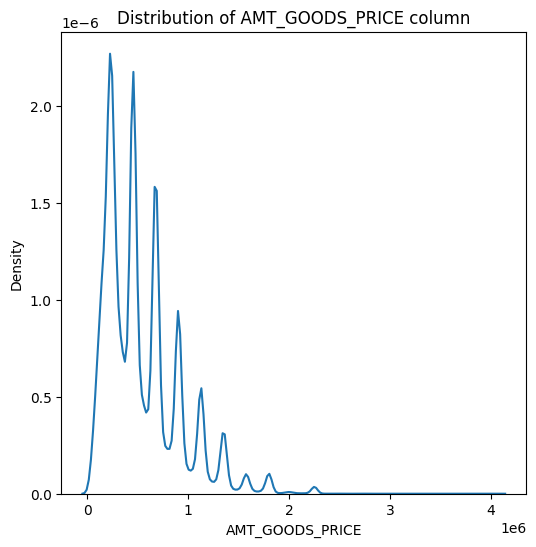

In [24]:
# distribution of AMT_GOODS_PRICE column
plt.figure(figsize=(6,6))
sns.kdeplot(rmv_app_df['AMT_GOODS_PRICE'])
plt.title("Distribution of AMT_GOODS_PRICE column")
plt.show()

Impute AMT_GOODS_PRICE with mode as the distribution is closely similar to original distribution.

In [25]:
# filling missing values in AMT_ANNUITY column with mean
rmv_app_df['AMT_GOODS_PRICE'] = rmv_app_df['AMT_GOODS_PRICE'].fillna(rmv_app_df['AMT_GOODS_PRICE'].mode()[0])

**NAME_TYPE_SUITE COLUMN**

In [26]:
# NAME_TYPE_SUITE column
rmv_app_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [27]:
# filling missing values in AMT_TYPE_SUITE column with mode
rmv_app_df['NAME_TYPE_SUITE'] = rmv_app_df['NAME_TYPE_SUITE'].fillna((rmv_app_df['NAME_TYPE_SUITE'].mode()[0]))

**OCCUPATION_TYPE COLUMN**

Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis.

In [28]:
# filling missing value in OCCUPATION_TYPE column with new value
rmv_app_df['OCCUPATION_TYPE'] = rmv_app_df['OCCUPATION_TYPE'].fillna('Unknown')

In [29]:
app_df[['CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']].describe()

CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE
count    307509.000000           307510.000000
mean          2.152665             -962.858788
std           0.910682              826.808487
min           1.000000            -4292.000000
25%           2.000000            -1570.000000
50%           2.000000             -757.000000
75%           3.000000             -274.000000
max          20.000000                0.000000

Impute CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE with median and mode as mean has decimals and this is number of people and number of days

In [30]:
# DAYS_LAST_PHONE_CHANGE and CNT_FAM_MEMBERS columns
rmv_app_df['CNT_FAM_MEMBERS'] = rmv_app_df['CNT_FAM_MEMBERS'].fillna(rmv_app_df['CNT_FAM_MEMBERS'].median())
rmv_app_df['DAYS_LAST_PHONE_CHANGE'] = rmv_app_df['DAYS_LAST_PHONE_CHANGE'].fillna(rmv_app_df['DAYS_LAST_PHONE_CHANGE'].mode()[0])

**AMT_REQ_CREDIT_BUREAU COLUMNS**

In [31]:
# AMT_REQ_CREDIT_BUREAU columns
rmv_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
            'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               265992.000000              265992.000000               265992.000000   
mean                     0.006402                   0.007000                    0.034362   
std                      0.083849                   0.110757                    0.204685   
min                      0.000000                   0.000000                    0.000000   
25%                      0.000000                   0.000000                    0.000000   
50%                      0.000000                   0.000000                    0.000000   
75%                      0.000000                   0.000000                    0.000000   
max                      4.000000                   9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000              265992.000000               265992.000000  
mean                    0.267395                   0.265474                    1.899974  
std                     0.916002                   0.794056                    1.869295  
min                     0.000000                   0.000000                    0.000000  
25%                     0.000000                   0.000000                    0.000000  
50%                     0.000000                   0.000000                    1.000000  
75%                     0.000000                   0.000000                    3.000000  
max                    27.000000                 261.000000                   25.000000

Impute with median as mean has decimals and this is number of requests

In [32]:
# filling missing values with median for amount request columns
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
          'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    rmv_app_df[col].fillna(rmv_app_df[col].median(),inplace = True)

**EXT_SOURCE COLUMNS**

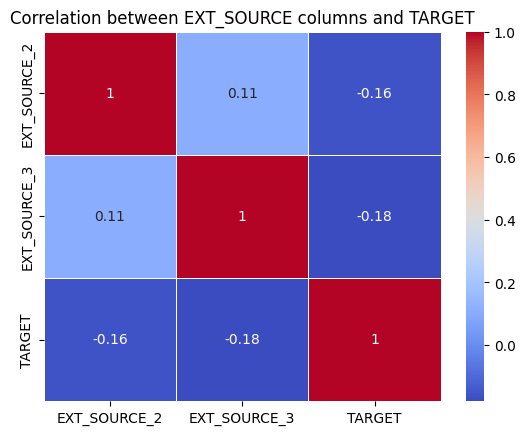

In [33]:
# checking correlation with target
ext_corr = rmv_app_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()

# plotting heatmap
sns.heatmap(data=ext_corr, annot = True, linewidth=0.5, cmap='coolwarm')
plt.title("Correlation between EXT_SOURCE columns and TARGET")
plt.show()

As we can see the EXT_SOURCE is less correlated so we drop EXT_SOURCE columns

In [34]:
# dropping EXT_SOURCE column
rmv_app_df = rmv_app_df.drop(labels=['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)

**SOCIAL CIRCLE COLUMNS**

In [35]:
# SOCIAL CIRCLE columns
rmv_app_df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000             306490.000000   
mean                   1.422245                  0.143421                  1.405292   
std                    2.400989                  0.446698                  2.379803   
min                    0.000000                  0.000000                  0.000000   
25%                    0.000000                  0.000000                  0.000000   
50%                    0.000000                  0.000000                  0.000000   
75%                    2.000000                  0.000000                  2.000000   
max                  348.000000                 34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000  
mean                   0.100049  
std                    0.362291  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   24.000000

For columns OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE we imputate with median because mean in decimal but these columns represent days.

In [36]:
# filling missing values with median for social circle columns
amount = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
          'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for col in amount:
    rmv_app_df[col].fillna(rmv_app_df[col].median(),inplace = True)

**Handling missing values in previous application dataset**

In [37]:
# dropping columns with more than 40% missing values
miss_prev_app = miss_pct_prev_app[miss_pct_prev_app['pct']>40]['column'].tolist()
rmv_prev_app_df = prev_app_df.drop(labels=miss_prev_app, axis=1)
print("Shape before removing column which more than 40% missing values :",prev_app_df.shape)
print("Shape before removing column which more than 40% missing values :",rmv_prev_app_df.shape)

Shape before removing column which more than 40% missing values : (1670214, 37)
Shape before removing column which more than 40% missing values : (1670214, 26)


**AMT_ANNUITY COLUMN**

In [38]:
# AMT_ANNUITY column
rmv_prev_app_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

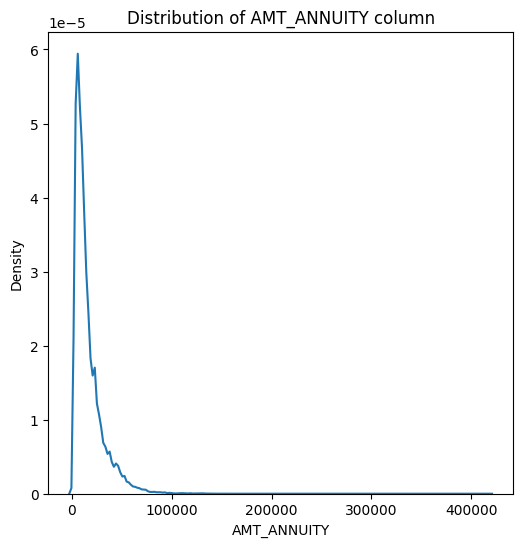

In [39]:
# distribution of AMT_ANNUITY column
plt.figure(figsize=(6,6))
sns.kdeplot(rmv_prev_app_df['AMT_ANNUITY'])
plt.title("Distribution of AMT_ANNUITY column")
plt.show()

The AMT_ANNUITY is right skewed so filling missing values with median.

In [40]:
# filling missing values in AMT_ANNUITY column with median
rmv_prev_app_df['AMT_ANNUITY'] = rmv_prev_app_df['AMT_ANNUITY'].fillna(rmv_prev_app_df['AMT_ANNUITY'].median())

**AMT_GOODS_PRICE COLUMN**

In [41]:
# AMT_GOODS_PRICE column
rmv_prev_app_df['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

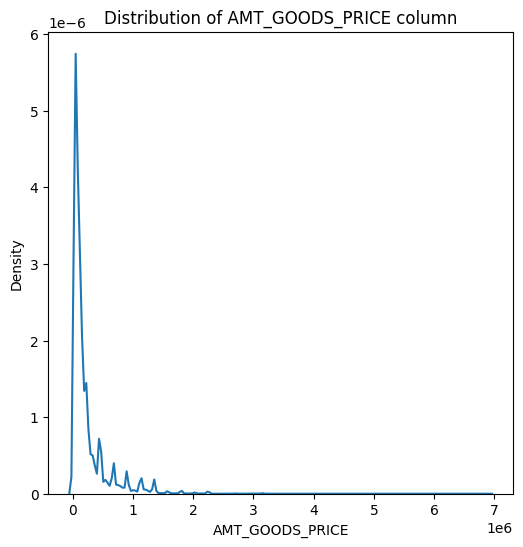

In [42]:
# distribution of AMT_GOODS_PRICE column
plt.figure(figsize=(6,6))
sns.kdeplot(rmv_prev_app_df['AMT_GOODS_PRICE'])
plt.title("Distribution of AMT_GOODS_PRICE column")
plt.show()

Impute AMT_GOODS_PRICE with mode as the distribution is closely similar to original distribution.

In [43]:
# filling missing values in AMT_ANNUITY column with mean
rmv_prev_app_df['AMT_GOODS_PRICE'] = rmv_prev_app_df['AMT_GOODS_PRICE'].fillna(rmv_prev_app_df['AMT_GOODS_PRICE'].mode()[0])

**CNT_PAYMENT COLUMN**

In [44]:
# CNT_PAYMENT column
rmv_prev_app_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [45]:
# comparing with NAME_CONTRACT_STATUS
rmv_prev_app_df.loc[rmv_prev_app_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Filling missing values in CNT_PAYMENT with 0 because most of them have not used status.

In [46]:
# filling missing values with 0
rmv_prev_app_df['CNT_PAYMENT'] = rmv_prev_app_df['CNT_PAYMENT'].fillna(0)

**AMT_CREDIT COLUMN**

In [47]:
# amt credit column
rmv_prev_app_df['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

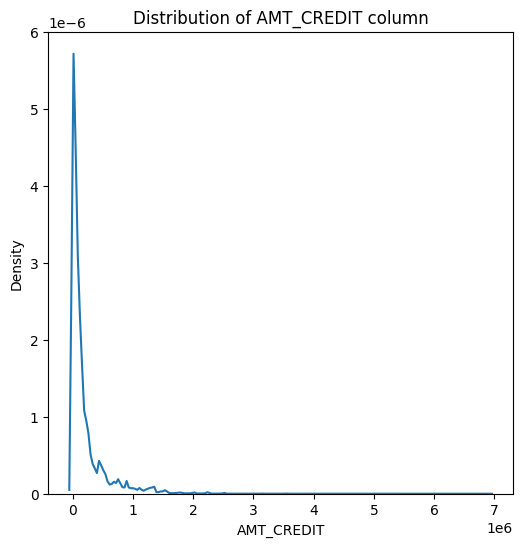

In [48]:
# distribution of AMT_CREDIT column
plt.figure(figsize=(6,6))
sns.kdeplot(rmv_prev_app_df['AMT_CREDIT'])
plt.title("Distribution of AMT_CREDIT column")
plt.show()

The AMT_CREDIT is right skewed so filling missing values with median.

In [49]:
# filling missing values in AMT_ANNUITY column with mean
rmv_prev_app_df['AMT_CREDIT'] = rmv_prev_app_df['AMT_CREDIT'].fillna(rmv_prev_app_df['AMT_GOODS_PRICE'].median())

**PRODUCT COMBINATION COLUMN**

In [50]:
# product_combination column value counts
rmv_prev_app_df['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

Filling missing values in PRODUCT_COMBINATION column with mode because its object type.

In [51]:
# filling missing values with mode
rmv_prev_app_df['PRODUCT_COMBINATION'] = rmv_prev_app_df['PRODUCT_COMBINATION'].fillna(rmv_prev_app_df['PRODUCT_COMBINATION'].mode()[0])

**CONVERTING NEGATIVE VALUES COLUMNS INTO ABSOLUTE VALUES COLUMNS**

In [52]:
# Converting Negative days to positive days of application dataset
date_col = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
            'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for col in date_col:
    rmv_app_df[col] = abs(rmv_app_df[col])

In [53]:
# Converting Negative days to positive days of previous application dataset
rmv_prev_app_df['DAYS_DECISION'] = abs(rmv_prev_app_df['DAYS_DECISION'])

### BINNING

**APPLICATION DATASET**

**AMT_INCOME_TOTAL COLUMN**

In [54]:
# binning AMT_INCOME_TOTAL column into AMT_INCOME_RANGE
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

rmv_app_df['AMT_INCOME_RANGE']=pd.cut(rmv_app_df['AMT_INCOME_TOTAL'], bins, labels=range)

In [55]:
# checking binnig data
rmv_app_df.groupby(['AMT_INCOME_RANGE']).size()

AMT_INCOME_RANGE
0-100K        63698
100K-200K    155898
200k-300k     65176
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
700k-800k       162
800k-900k       298
900k-1M          28
1M Above         18
dtype: int64

**AMT_CREDIT COLUMN**

In [56]:
# binning AMT_CREDIT column into AMT_CREDIT_RANGE
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

rmv_app_df['AMT_CREDIT_RANGE']=pd.cut(rmv_app_df['AMT_CREDIT'], bins, labels=range)

In [57]:
# checking binnig data
rmv_app_df.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-100K        6004
100K-200K    30140
200k-300k    54813
300k-400k    26338
400k-500k    32038
500k-600k    34232
600k-700k    24049
700k-800k    19193
800k-900k    21792
900k-1M       8927
1M Above     13422
dtype: int64

**AMT_GOODS_PRICE COLUMN**

In [58]:
# binning AMT_GOODS_PRICE column into AMT_GOODS_PRICE_RANGE
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

rmv_app_df['AMT_GOODS_PRICE_RANGE']=pd.cut(rmv_app_df['AMT_GOODS_PRICE'], bins, labels=range)

In [59]:
# checkig binned data
rmv_app_df.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K        8709
100K-200K    32956
200k-300k    62761
300k-400k    21219
400k-500k    57251
500k-600k    13117
600k-700k    40024
700k-800k     8110
800k-900k    21484
900k-1M       7761
1M Above      3512
dtype: int64

**DAYS_BIRTH COLUMN**

In [60]:
# Creating bins for Age
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

rmv_app_df['AGE_GROUP']=pd.cut((rmv_app_df['DAYS_BIRTH'] // 365), bins=bins, labels=slots)

In [61]:
# checking binned data
rmv_app_df.groupby(['AGE_GROUP']).size()

AGE_GROUP
0-20            1
20-30       52805
30-40       83117
40-50       74401
50 above    97187
dtype: int64

**DAYS_EMPLOYED**

In [62]:
# Creating bins for Employement Time
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

rmv_app_df['EMPLOYMENT_YEAR_RANGE']=pd.cut((rmv_app_df['DAYS_EMPLOYED'] // 365),bins=bins,labels=slots)

In [63]:
# checking binned data
rmv_app_df.groupby(['EMPLOYMENT_YEAR_RANGE']).size()

EMPLOYMENT_YEAR_RANGE
0-5         124634
5-10         55983
10-20        32658
20-30         8409
30-40         2374
40-50          175
50-60            0
60 above         0
dtype: int64

In [64]:
rmv_app_df.shape

(307511, 76)

In [65]:
# information before converting into categorical columns
rmv_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [66]:
#Conversion of Object to Categorical Columns of application dataset
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    rmv_app_df[col] = pd.Categorical(rmv_app_df[col])

In [67]:
# information after converting into categorical columns
rmv_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [68]:
# information before converting into categorical columns
rmv_prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [69]:
#Converting Categorical columns from Object to categorical of previous application
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                    'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT']

for col in Catgorical_col_p:
    rmv_prev_app_df[col] =pd.Categorical(rmv_prev_app_df[col])

In [70]:
# information after converting into categorical columns
rmv_prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670214 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

**Outlier Identification**

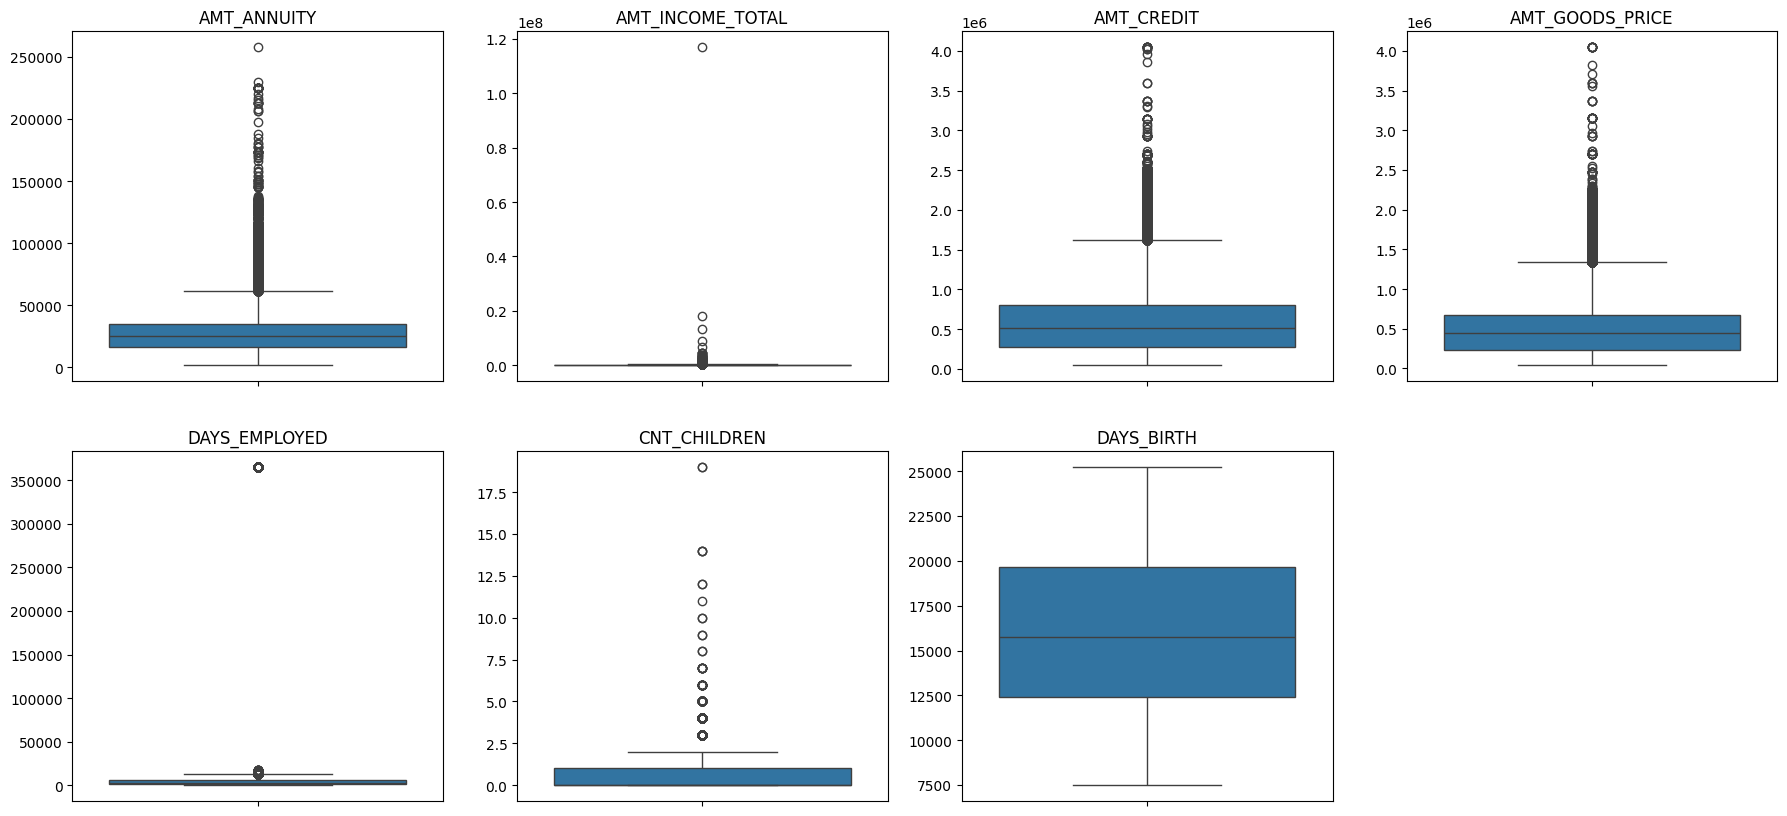

In [71]:
# visualizing outliers in application dataset
plt.figure(figsize=(22,10))

app_outlier_col= ['AMT_ANNUITY','AMT_INCOME_TOTAL',
                  'AMT_CREDIT','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=rmv_app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
plt.show()

* It can be seen that in current application data
AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
* AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
* DAYS_BIRTH has no outliers which means the data available is reliable.
* DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

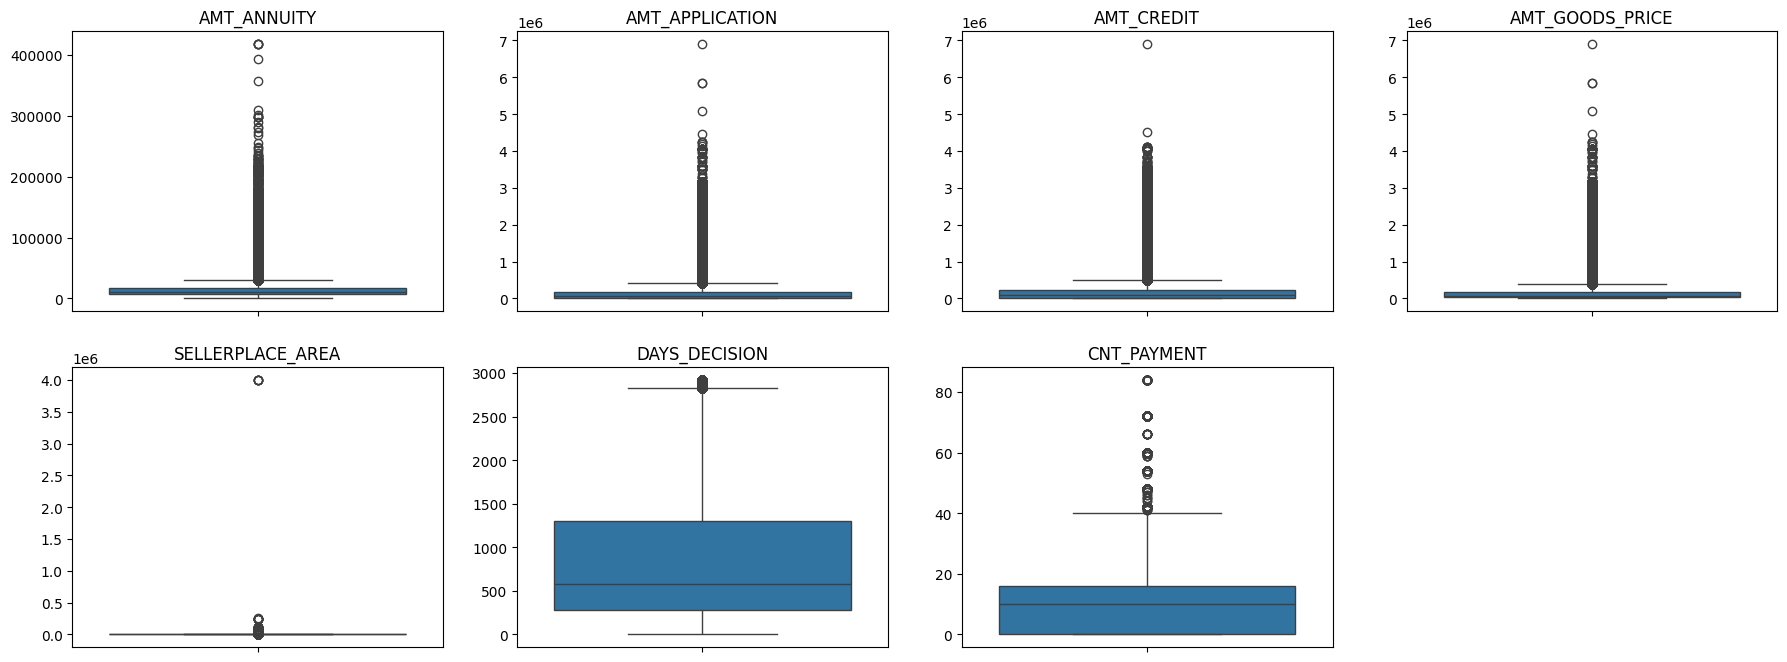

In [72]:
# visualizing outliers in previous application dataset
plt.figure(figsize=(22,8))

prev_outlier_col = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
                    'AMT_GOODS_PRICE', 'SELLERPLACE_AREA',
                    'DAYS_DECISION', 'CNT_PAYMENT']

for i in enumerate(prev_outlier_col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=rmv_prev_app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
plt.show()

* It can be seen that in previous application data
AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
* CNT_PAYMENT has few outlier values.
* DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

## ANALYSIS

In [73]:
#seperating dataset based on Target
# default dataset
default_df = rmv_app_df[rmv_app_df['TARGET']==1]
# non-default dataset
nondefault_df = rmv_app_df[rmv_app_df['TARGET']==0]

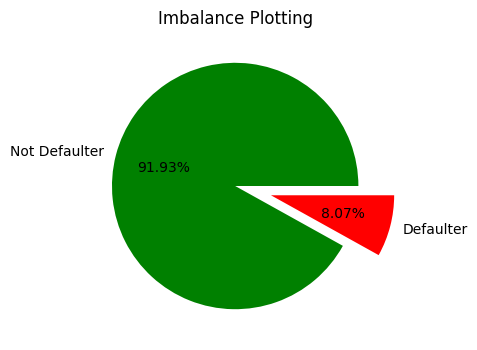

In [74]:
# loan defaulter proportion
Imbalance = rmv_app_df["TARGET"].value_counts()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
plt.pie(x=Imbalance.values, labels=['Not Defaulter', 'Defaulter'], colors=['g','r'], explode=[0,0.3], autopct='%1.2f%%')
plt.title("Imbalance Plotting")
plt.show()

* 8.07%(24825) clients are defaulters.
* 91.93%(282686) clients are non defaulters.


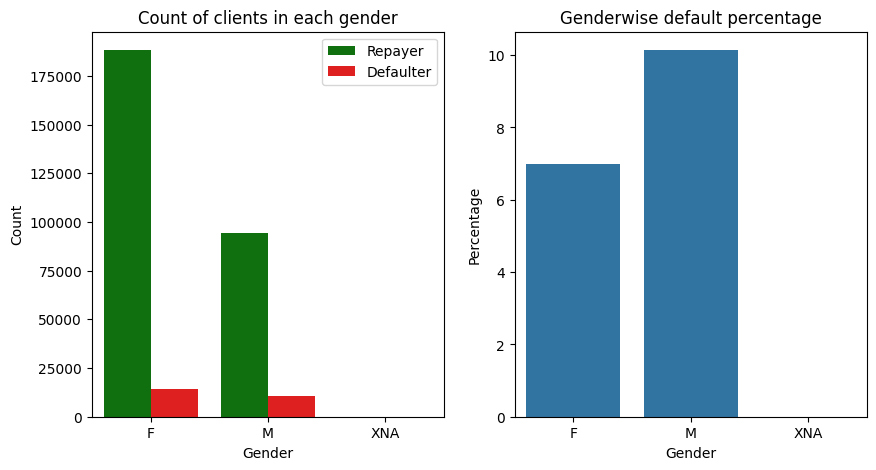

In [75]:
# relation between gender and defaulter
# percenatge of default in each gender
gender_perc = rmv_app_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
gender_perc['TARGET'] = gender_perc['TARGET']*100
gender_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each gender
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='CODE_GENDER', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in each gender
plt.subplot(1,2,2)
sns.barplot(data=gender_perc, x='CODE_GENDER', y='TARGET')
plt.title('Genderwise default percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage')

plt.show()

The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (10%), comparing with women (7%).


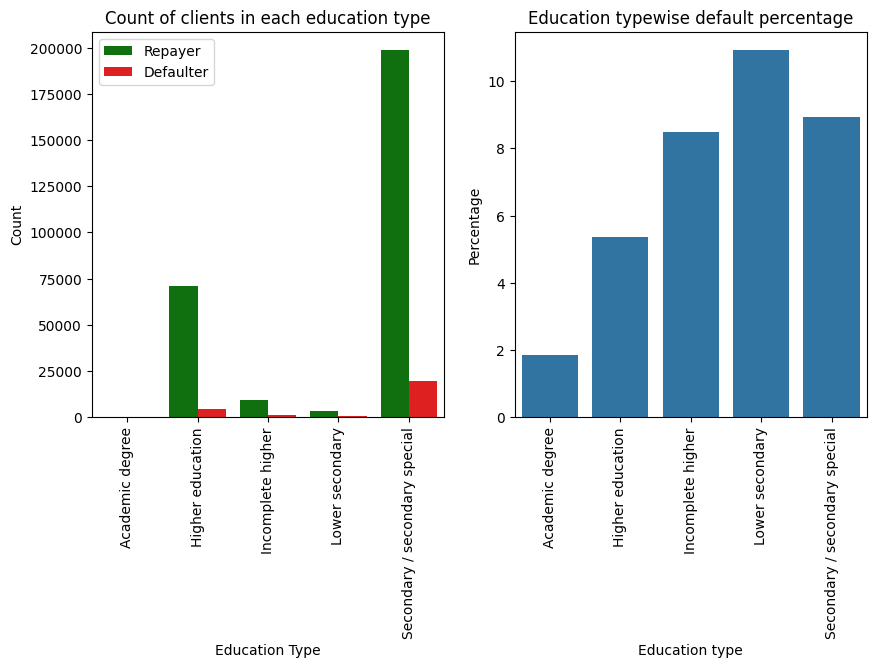

In [76]:
# relation between education type and defaulter
# percenatge of default in each eductaion type
edu_perc = rmv_app_df[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean()
edu_perc['TARGET'] = edu_perc['TARGET']*100
edu_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each education type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='NAME_EDUCATION_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each education type')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each education type
plt.subplot(1,2,2)
sns.barplot(data=edu_perc, x='NAME_EDUCATION_TYPE', y='TARGET')
plt.title('Education typewise default percentage')
plt.xlabel('Education type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
* The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

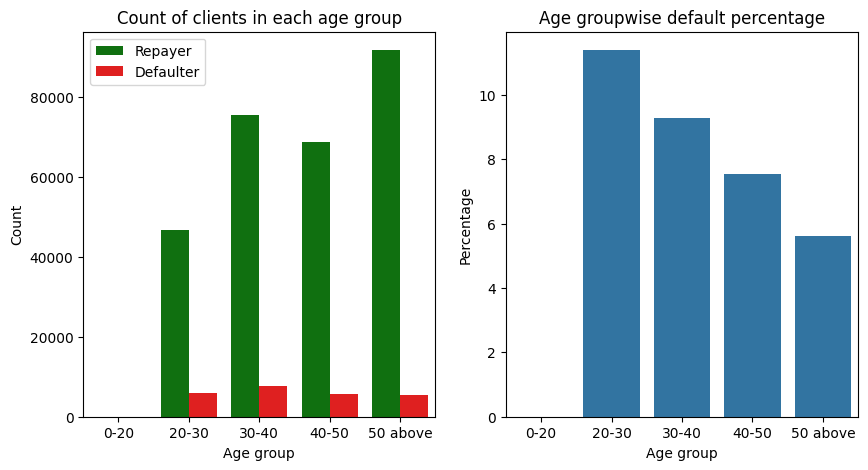

In [77]:
# relation between age group and defaulter
# percenatge of default in each age group
age_perc = rmv_app_df[['AGE_GROUP', 'TARGET']].groupby(['AGE_GROUP'],as_index=False).mean()
age_perc['TARGET'] = age_perc['TARGET']*100
age_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each age group
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='AGE_GROUP', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in each age group
plt.subplot(1,2,2)
sns.barplot(data=age_perc, x='AGE_GROUP', y='TARGET')
plt.title('Age groupwise default percentage')
plt.xlabel('Age group')
plt.ylabel('Percentage')

plt.show()

* People in the age group range 20-40 have higher probability of defaulting.
* People above age of 50 have low probability of defaulting.

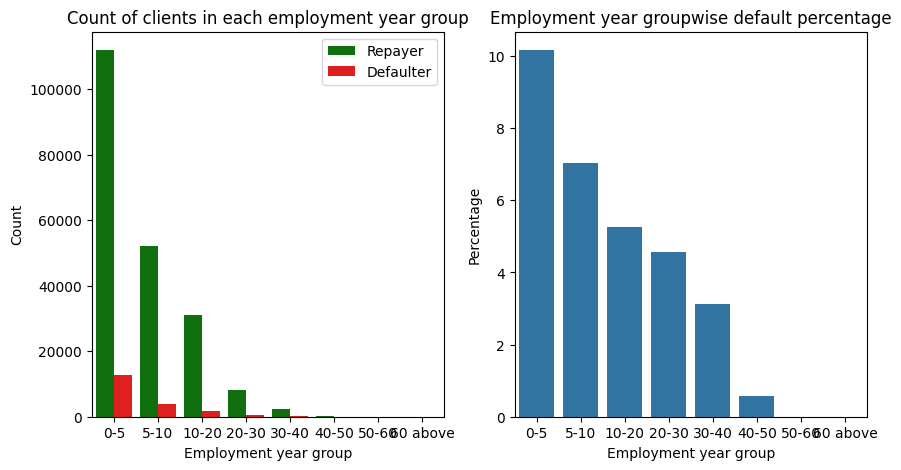

In [78]:
# relation between employment year group and defaulter
# percenatge of default in each employment year group
emp_perc = rmv_app_df[['EMPLOYMENT_YEAR_RANGE', 'TARGET']].groupby(['EMPLOYMENT_YEAR_RANGE'],as_index=False).mean()
emp_perc['TARGET'] = emp_perc['TARGET']*100
emp_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each employment year group
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='EMPLOYMENT_YEAR_RANGE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each employment year group')
plt.xlabel('Employment year group')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in each employment year group
plt.subplot(1,2,2)
sns.barplot(data=emp_perc, x='EMPLOYMENT_YEAR_RANGE', y='TARGET')
plt.title('Employment year groupwise default percentage')
plt.xlabel('Employment year group')
plt.ylabel('Percentage')

plt.show()

* Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%.
* With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate.

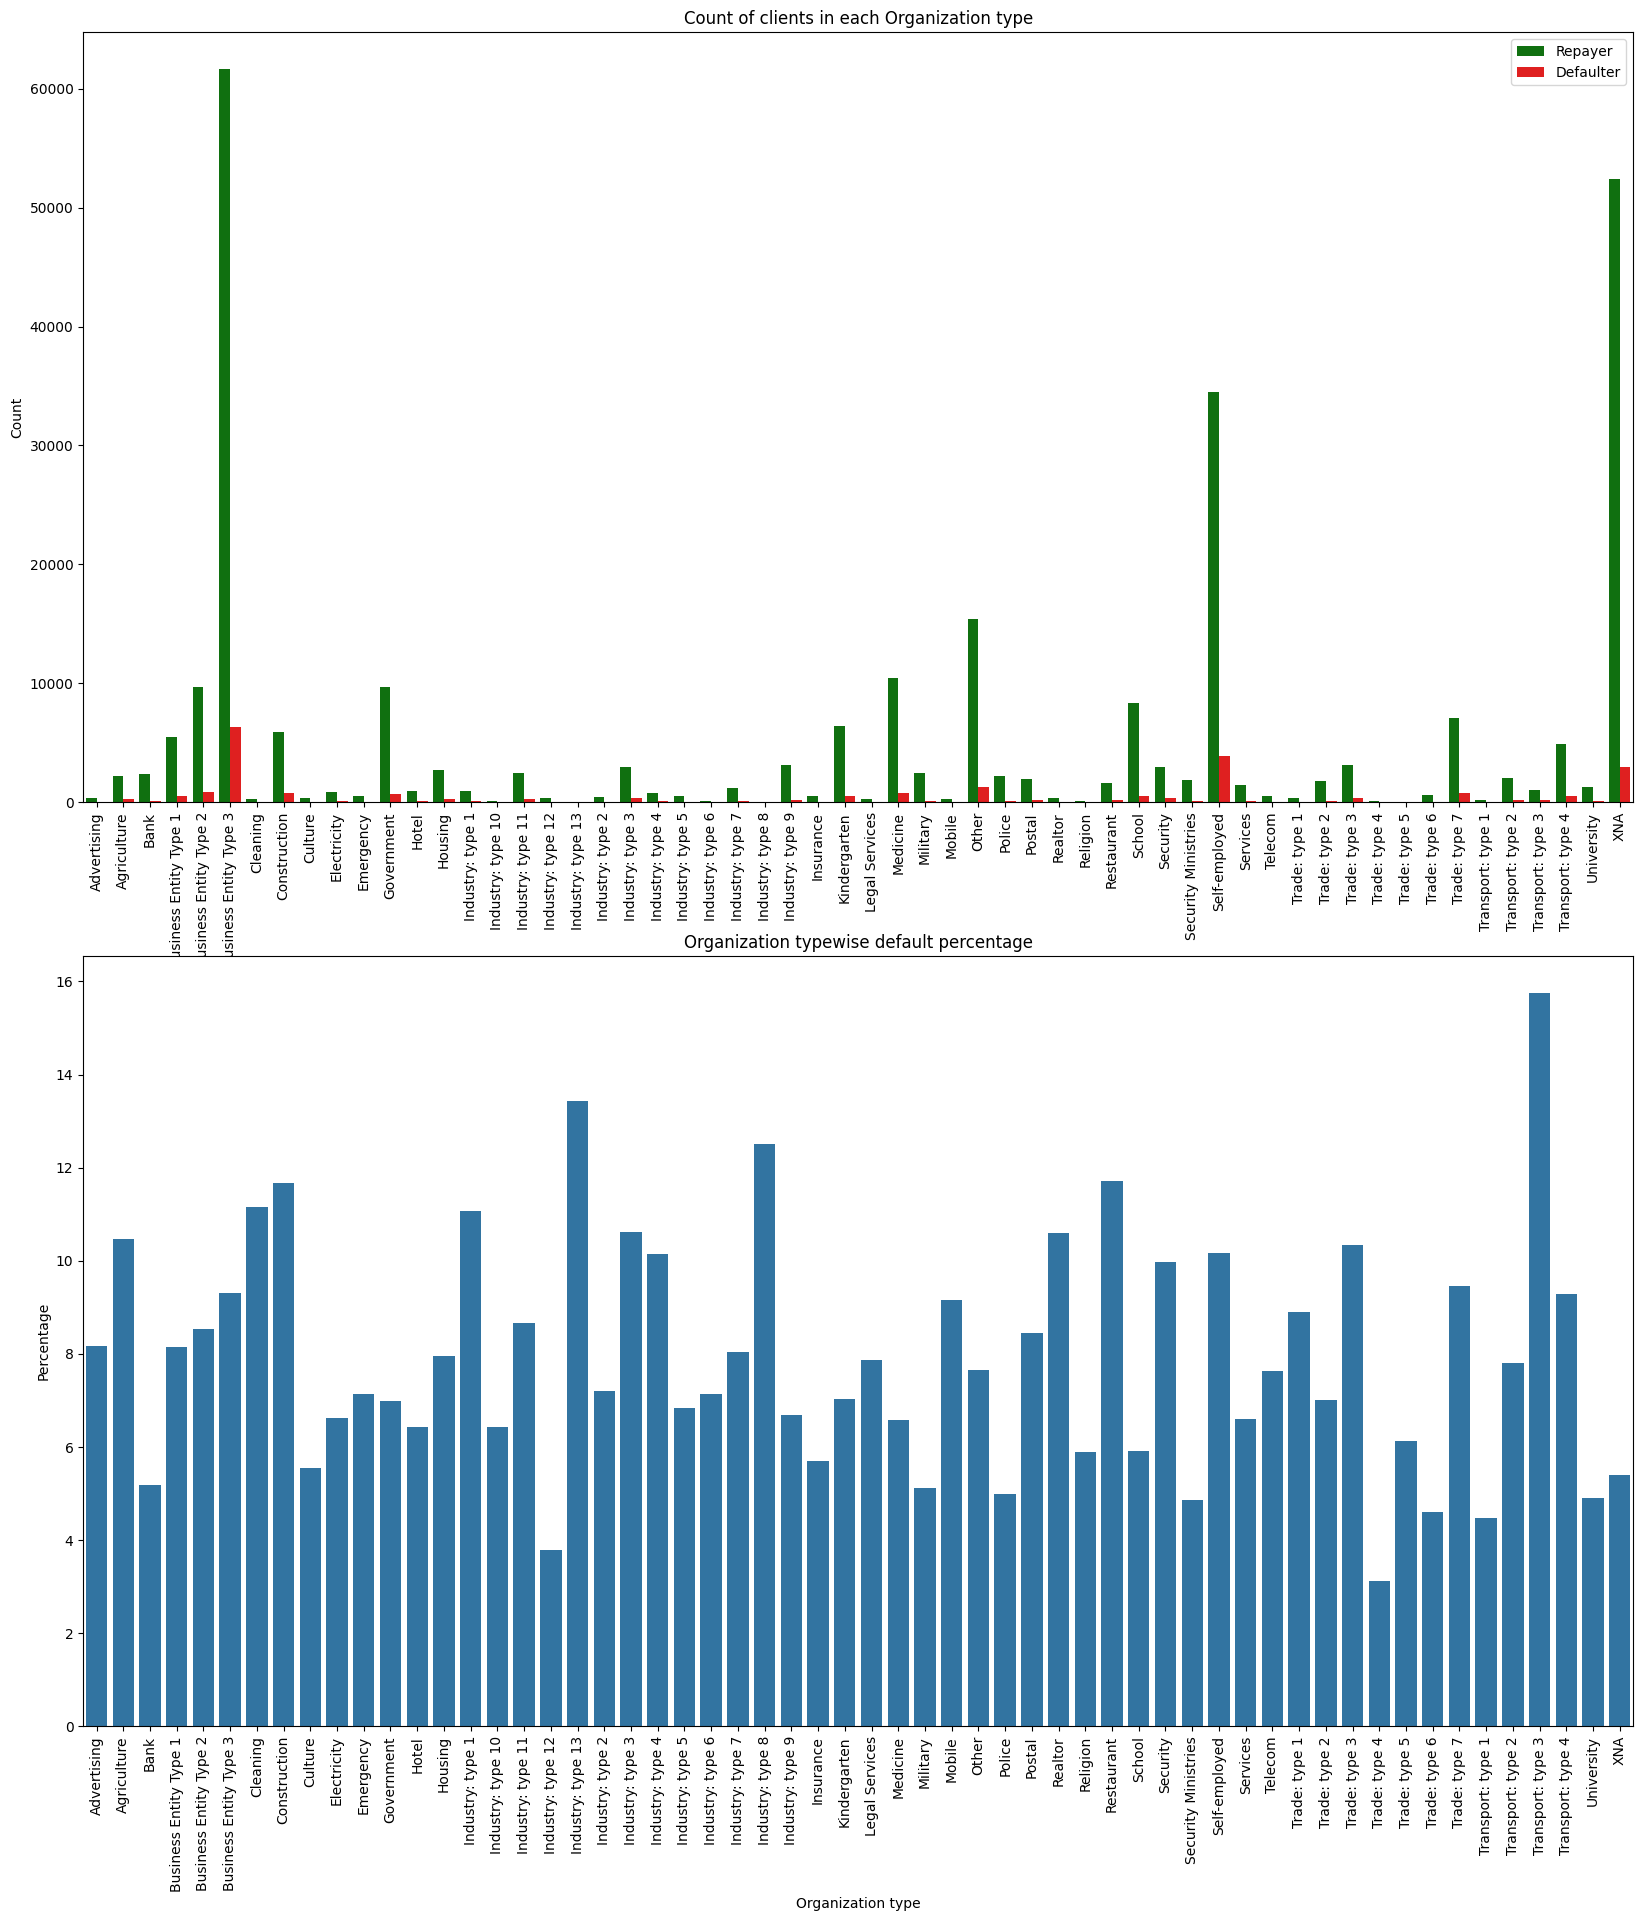

In [79]:
# relation between organization type and defaulter
# percenatge of default in each organization type
org_perc = rmv_app_df[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
org_perc['TARGET'] = org_perc['TARGET']*100
org_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each organization type
plt.figure(figsize=(20,22))
plt.subplot(2,1,1)
sns.countplot(data=rmv_app_df, x='ORGANIZATION_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each Organization type')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each organization type
plt.subplot(2,1,2)
sns.barplot(data=org_perc, x='ORGANIZATION_TYPE', y='TARGET')
plt.title('Organization typewise default percentage')
plt.xlabel('Organization type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
* Most of the people application for loan are from Business Entity Type 3
* For a very high number of applications, Organization type information is unavailable(XNA)

It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
* Trade Type 4
* Industry Type 12


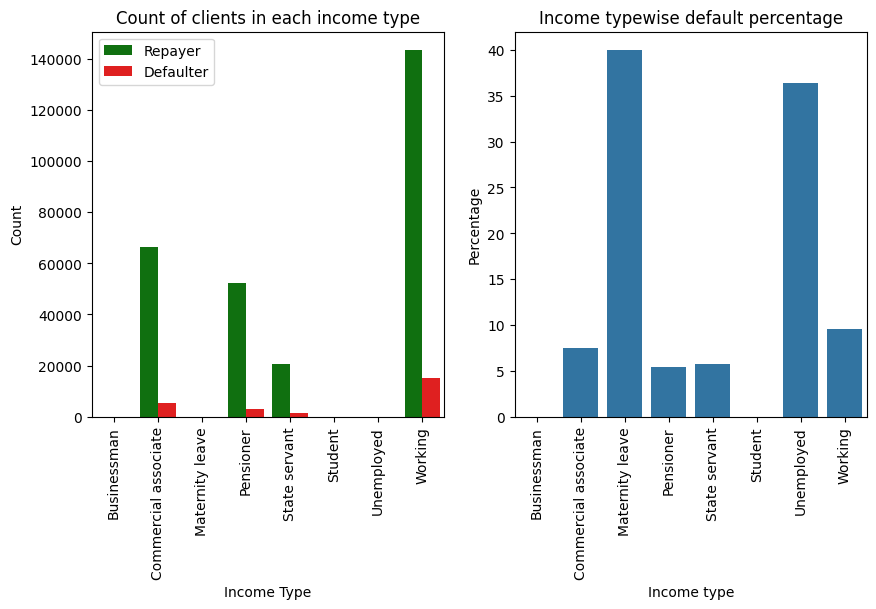

In [80]:
# relation between income type and defaulter
# percenatge of default in each income type
income_perc = rmv_app_df[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()
income_perc['TARGET'] = income_perc['TARGET']*100
income_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each income type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='NAME_INCOME_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each income type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each income type
plt.subplot(1,2,2)
sns.barplot(data=income_perc, x='NAME_INCOME_TYPE', y='TARGET')
plt.title('Income typewise default percentage')
plt.xlabel('Income type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
* The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
* Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.
* Pensioners and State servants have low default rate.

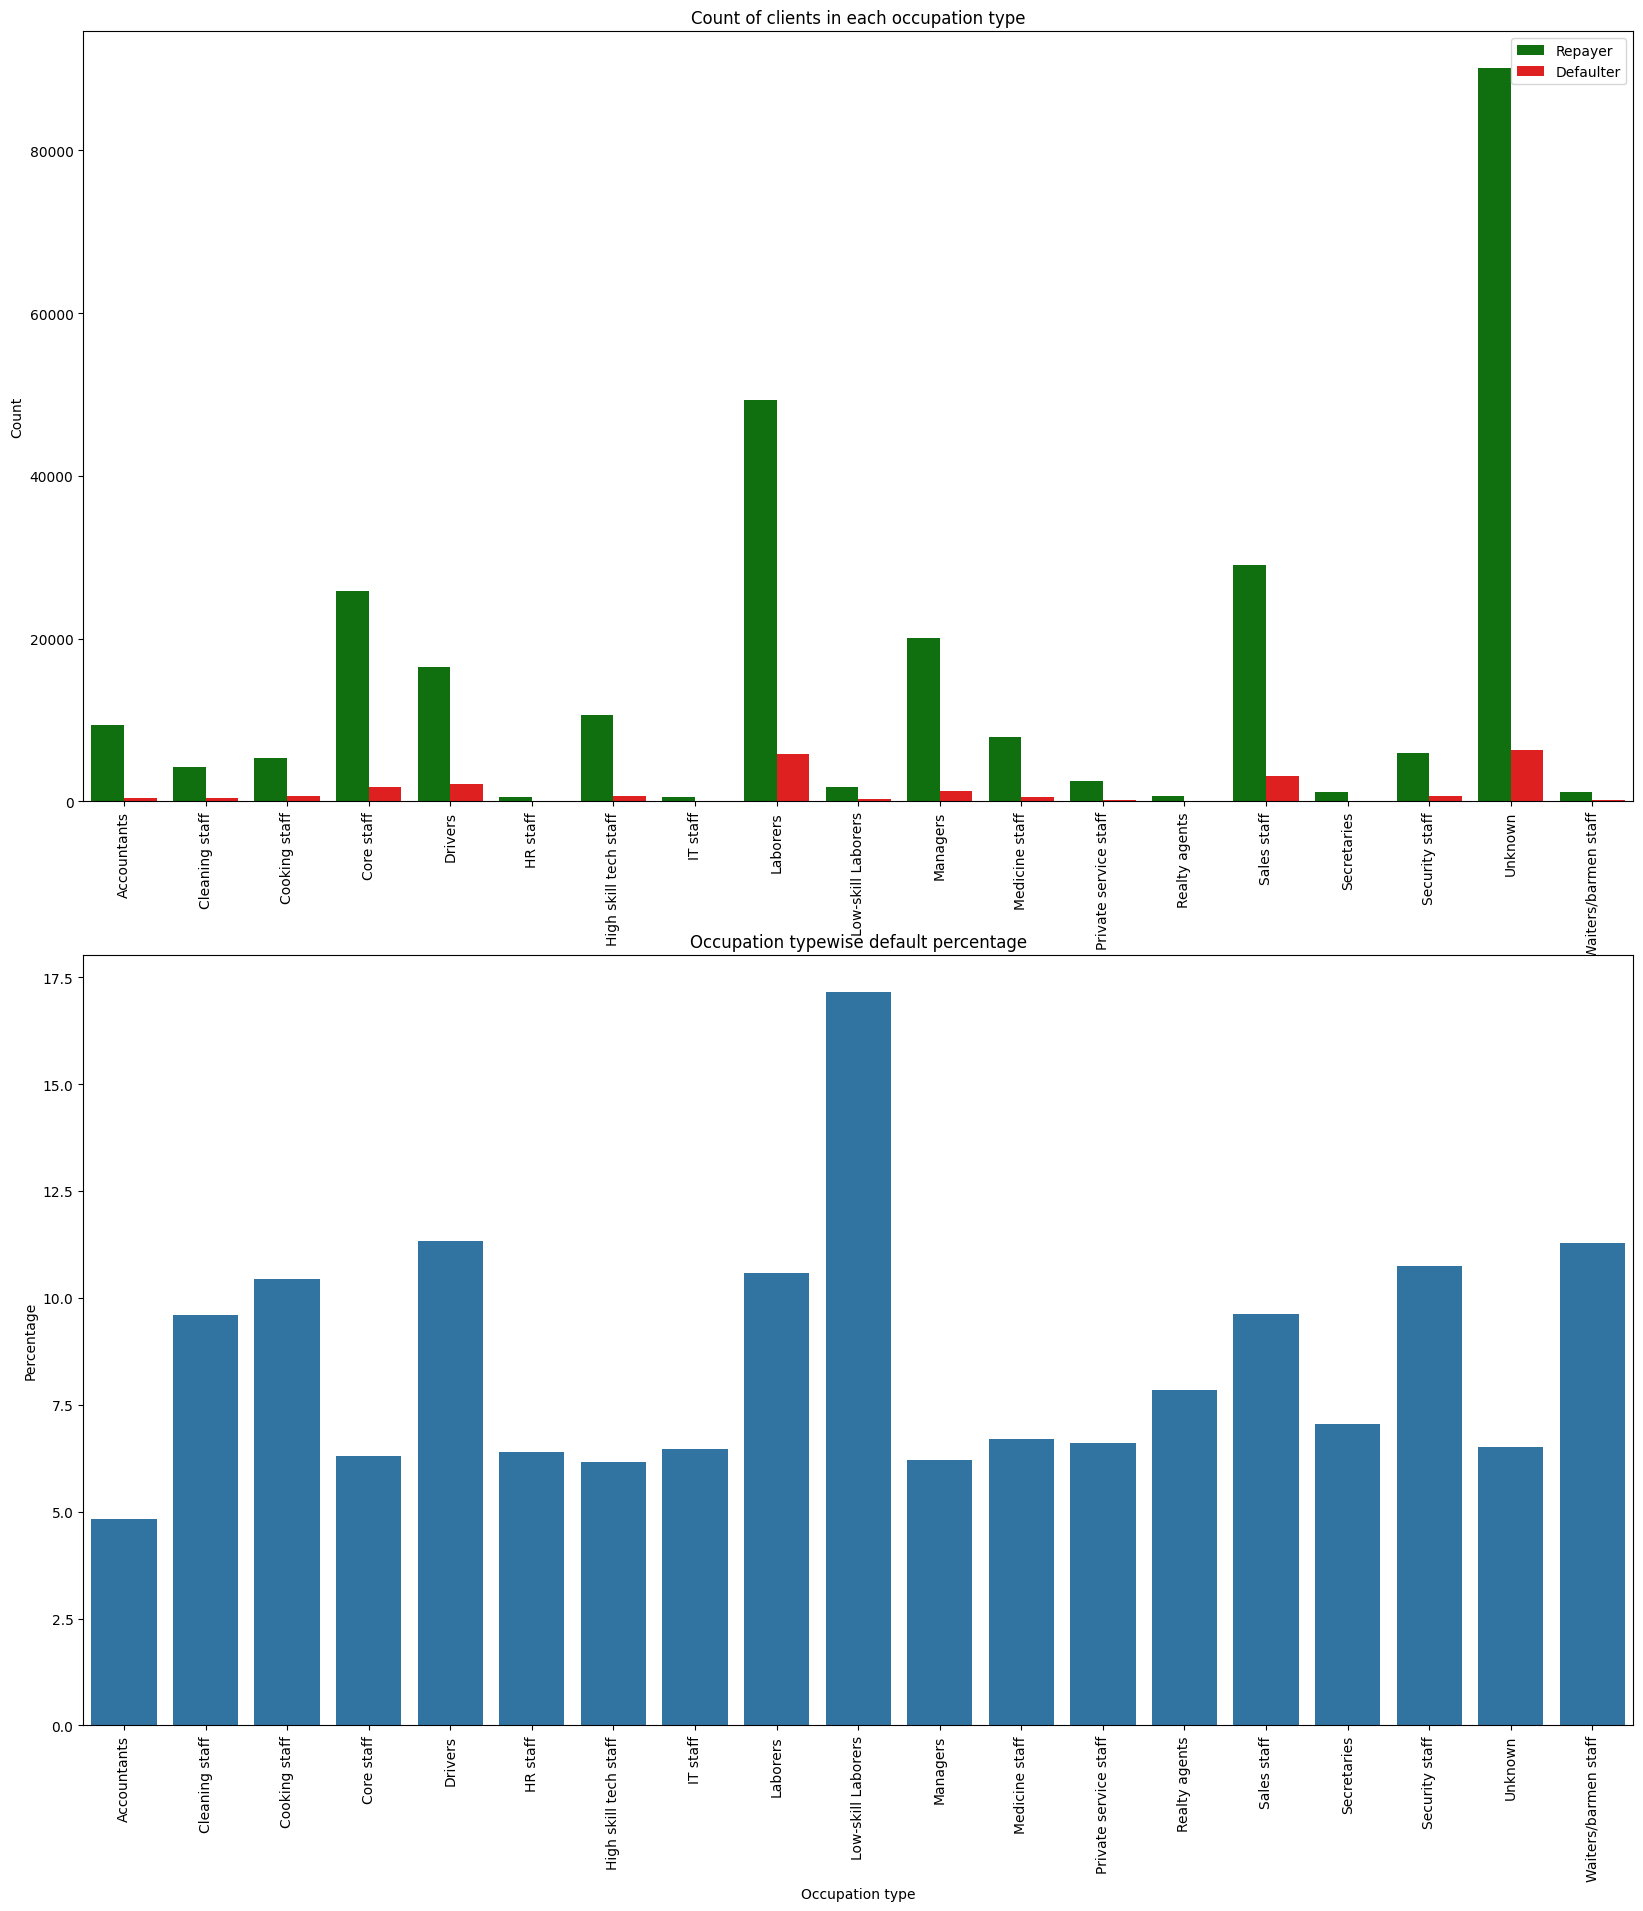

In [81]:
# relation between occupation type and defaulter
# percenatge of default in each occupation type
ocp_perc = rmv_app_df[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()
ocp_perc['TARGET'] = ocp_perc['TARGET']*100
ocp_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each occupation type
plt.figure(figsize=(20,22))
plt.subplot(2,1,1)
sns.countplot(data=rmv_app_df, x='OCCUPATION_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each occupation type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each occupation type
plt.subplot(2,1,2)
sns.barplot(data=ocp_perc, x='OCCUPATION_TYPE', y='TARGET')
plt.title('Occupation typewise default percentage')
plt.xlabel('Occupation type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Most of the loans are taken by Laborers, followed by Sales staff. IT staff and HR Staff take the lowest amount of loans.
* The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

In [82]:
# income to debt ratio
income_debt = rmv_app_df[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET']]
income_debt['inc_debt_ratio'] =  (income_debt['AMT_CREDIT']/income_debt['AMT_INCOME_TOTAL'])

# binning income to debt ratio
bins = [0,2,4,6,8,10,100]
slots = ['0-2','2-4','4-6','6-8','8-10','above 10']
income_debt['inc_debt_ratio_range'] = pd.cut((income_debt['inc_debt_ratio']), bins=bins, labels=slots)

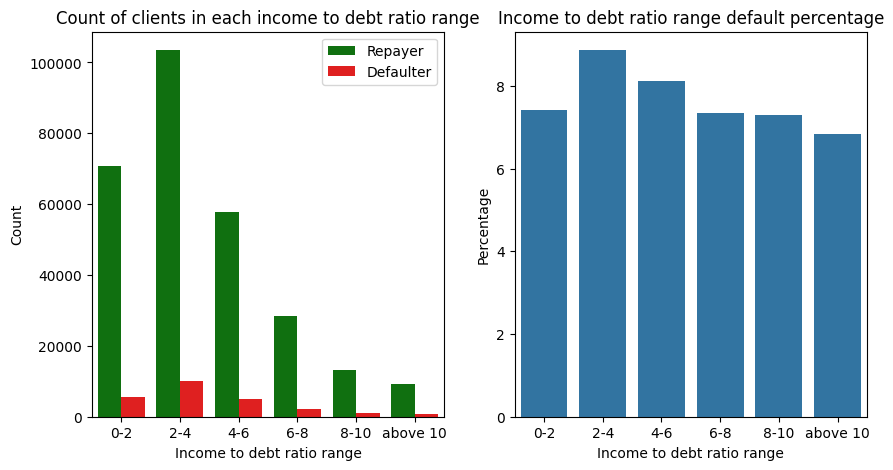

In [83]:
# relation between income to debt ratio and defaulter
# percenatge of default in each income to debt ratio
idr_perc = income_debt[['inc_debt_ratio_range', 'TARGET']].groupby(['inc_debt_ratio_range'],as_index=False).mean()
idr_perc['TARGET'] = idr_perc['TARGET']*100
idr_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each income to debt ratio
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=income_debt, x='inc_debt_ratio_range', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each income to debt ratio range')
plt.xlabel('Income to debt ratio range')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in each occupation type
plt.subplot(1,2,2)
sns.barplot(data=idr_perc, x='inc_debt_ratio_range', y='TARGET')
plt.title('Income to debt ratio range default percentage')
plt.xlabel('Income to debt ratio range')
plt.ylabel('Percentage')

plt.show()

* Most of the clients have income to debt ratio in range of 2-4%.
* Every income to debt ratio has default rate more than 5%.

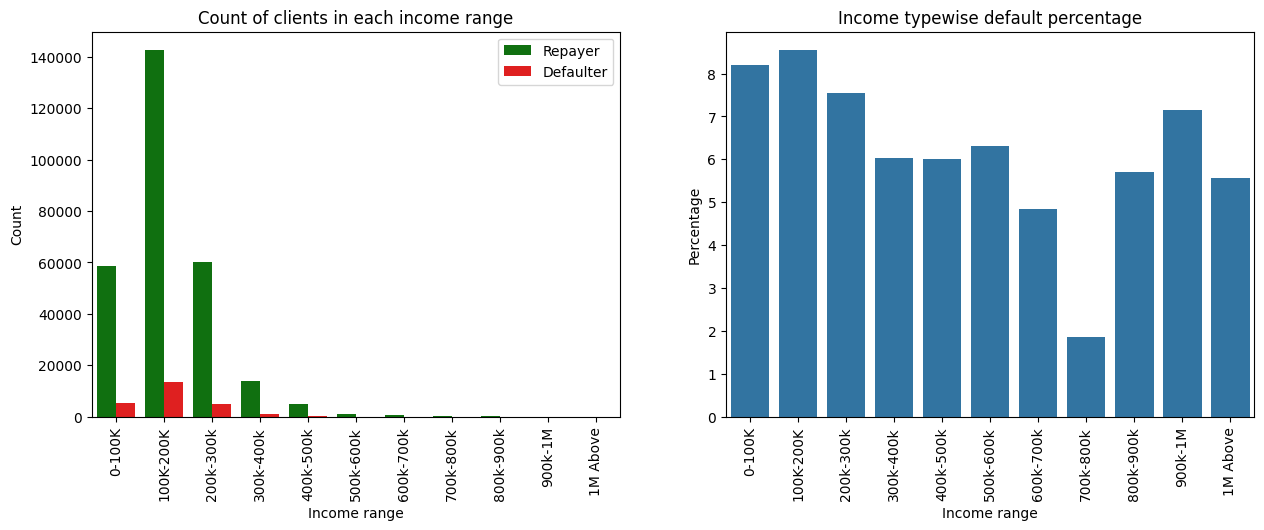

In [84]:
# relation between income range and defaulter
# percenatge of default in each income range
ir_perc = rmv_app_df[['AMT_INCOME_RANGE', 'TARGET']].groupby(['AMT_INCOME_RANGE'],as_index=False).mean()
ir_perc['TARGET'] = ir_perc['TARGET']*100
ir_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each income range
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='AMT_INCOME_RANGE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each income range')
plt.xlabel('Income range')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each income type
plt.subplot(1,2,2)
sns.barplot(data=ir_perc, x='AMT_INCOME_RANGE', y='TARGET')
plt.title('Income typewise default percentage')
plt.xlabel('Income range')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* 90% of the applications have Income total less than 300,000
* Application with Income less than 300,000 has high probability of defaulting
* Applicant with Income more than 700,000 are less likely to default

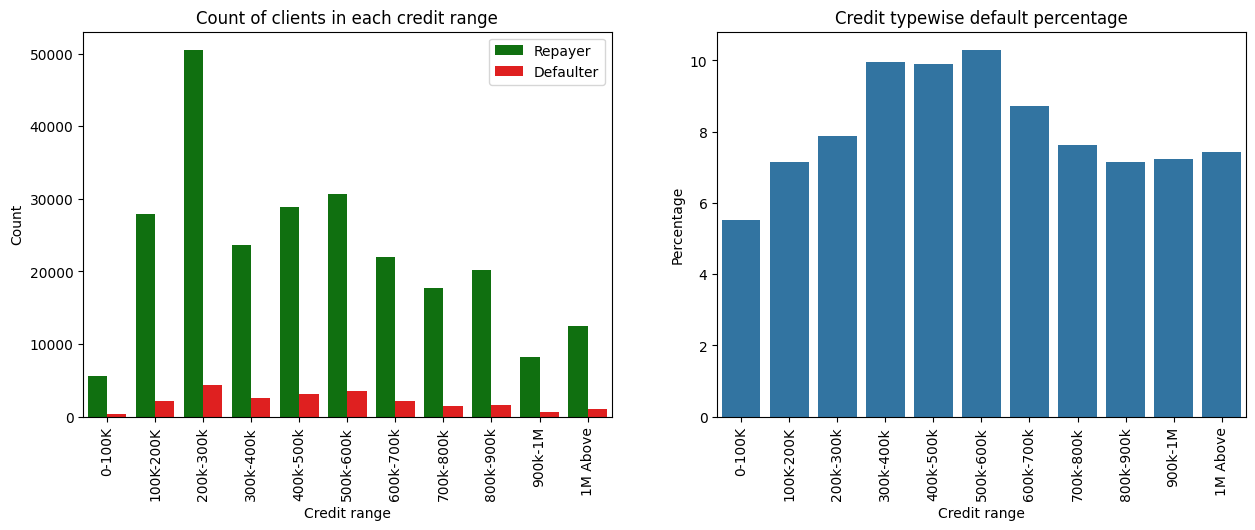

In [85]:
# relation between credit range and defaulter
# percenatge of default in each credit range
cr_perc = rmv_app_df[['AMT_CREDIT_RANGE', 'TARGET']].groupby(['AMT_CREDIT_RANGE'],as_index=False).mean()
cr_perc['TARGET'] = cr_perc['TARGET']*100
cr_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each credit range
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='AMT_CREDIT_RANGE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each credit range')
plt.xlabel('Credit range')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each credit type
plt.subplot(1,2,2)
sns.barplot(data=cr_perc, x='AMT_CREDIT_RANGE', y='TARGET')
plt.title('Credit typewise default percentage')
plt.xlabel('Credit range')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* More than 80% of the loan provided are for amount less than 900,000
* People who get loan for 300-600k tend to default more than others.

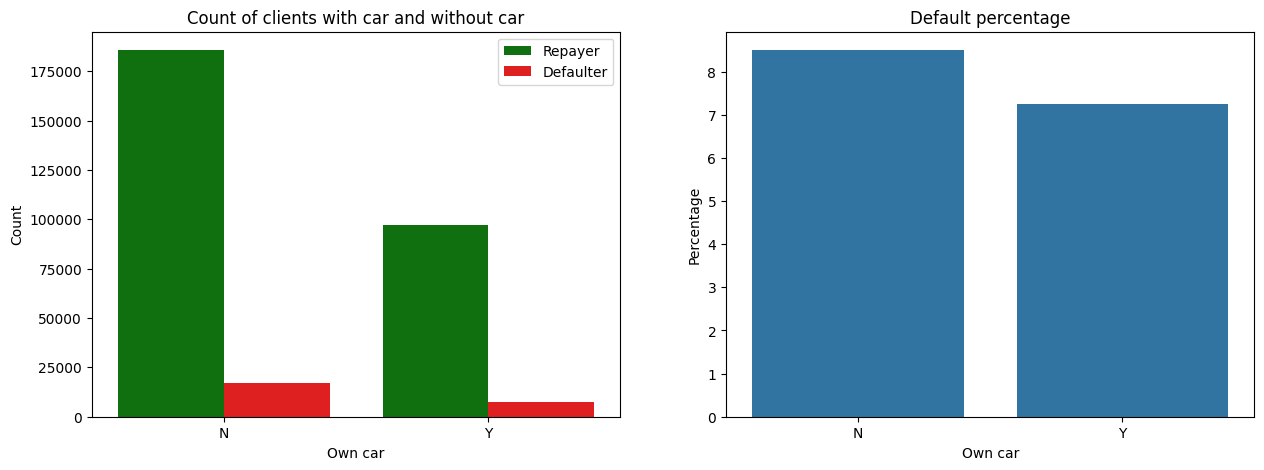

In [86]:
# relation between clients with car and defaulter
# percenatge of default in clients with car
car_perc = rmv_app_df[['FLAG_OWN_CAR', 'TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean()
car_perc['TARGET'] = car_perc['TARGET']*100
car_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients with car and without car
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='FLAG_OWN_CAR', hue='TARGET', palette=['g','r'])
plt.title('Count of clients with car and without car')
plt.xlabel('Own car')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in clients with car and without car
plt.subplot(1,2,2)
sns.barplot(data=car_perc, x='FLAG_OWN_CAR', y='TARGET')
plt.title('Default percentage')
plt.xlabel('Own car')
plt.ylabel('Percentage')

plt.show()

Clients who own a car are half in number of the clients who don't own a car. But based on the percentage of default, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

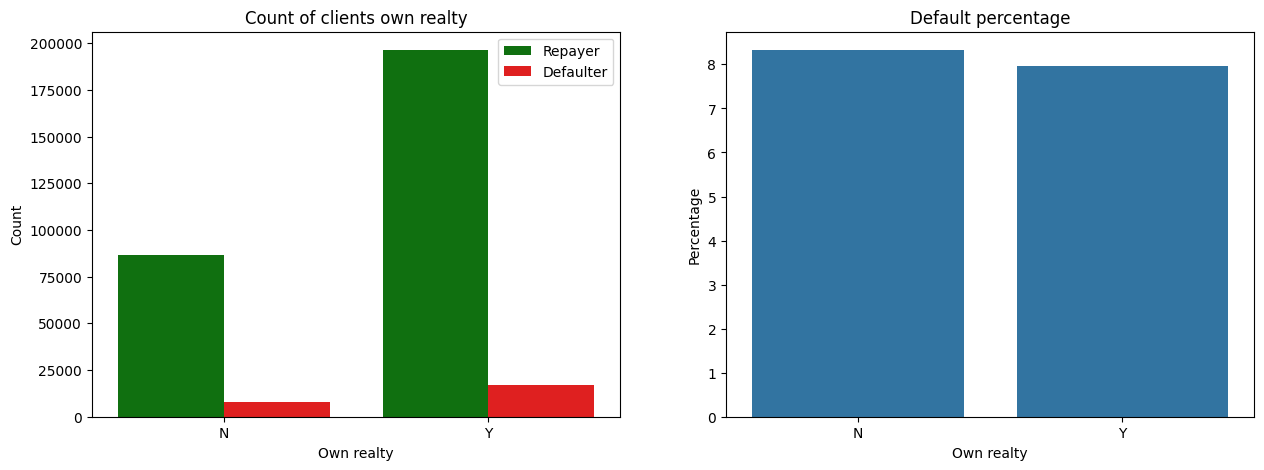

In [87]:
# relation between clients with realty and defaulter
# percenatge of default in clients with realty
r_perc = rmv_app_df[['FLAG_OWN_REALTY', 'TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean()
r_perc['TARGET'] = r_perc['TARGET']*100
r_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients own realty
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='FLAG_OWN_REALTY', hue='TARGET', palette=['g','r'])
plt.title('Count of clients own realty')
plt.xlabel('Own realty')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])

# plot2 for percantage of defaulter in clients own realty
plt.subplot(1,2,2)
sns.barplot(data=r_perc, x='FLAG_OWN_REALTY', y='TARGET')
plt.title('Default percentage')
plt.xlabel('Own realty')
plt.ylabel('Percentage')

plt.show()

The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.


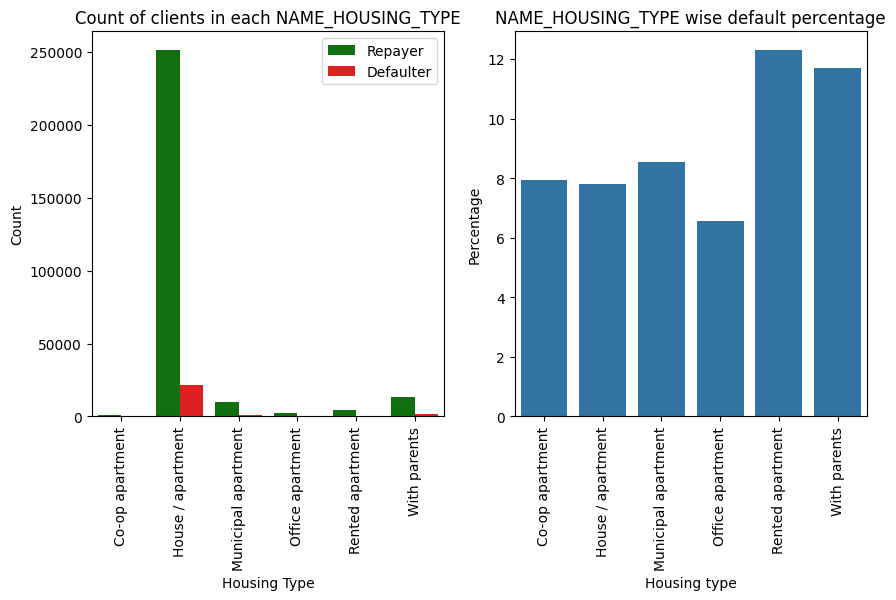

In [88]:
# relation between NAME_HOUSING_TYPE type and defaulter
# percenatge of default in each NAME_HOUSING_TYPE
ht_prec = rmv_app_df[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean()
ht_prec['TARGET'] = ht_prec['TARGET']*100
ht_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each NAME_HOUSING_TYPE
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='NAME_HOUSING_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each NAME_HOUSING_TYPE')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each NAME_HOUSING_TYPE
plt.subplot(1,2,2)
sns.barplot(data=ht_prec, x='NAME_HOUSING_TYPE', y='TARGET')
plt.title('NAME_HOUSING_TYPE wise default percentage')
plt.xlabel('Housing type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Majority of people live in House/apartment
* People living in office apartments have lowest default rate
* People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

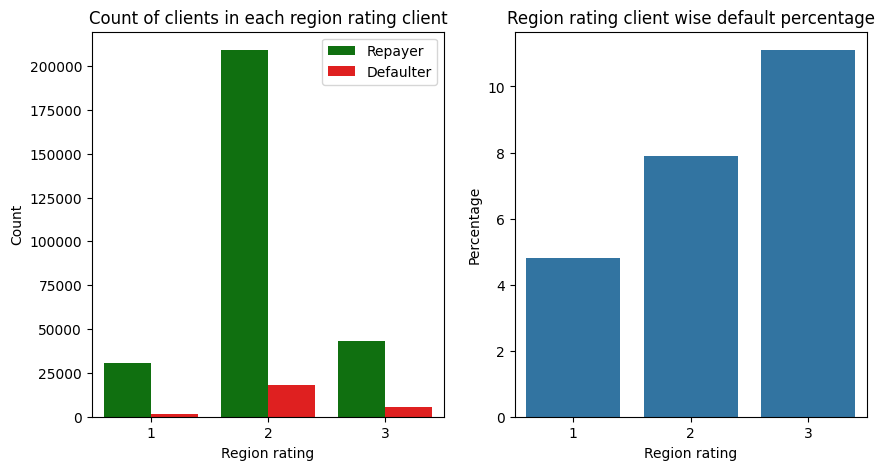

In [89]:
# relation between region rating client and defaulter
# percenatge of default in each region rating client
ht_prec = rmv_app_df[['REGION_RATING_CLIENT', 'TARGET']].groupby(['REGION_RATING_CLIENT'],as_index=False).mean()
ht_prec['TARGET'] = ht_prec['TARGET']*100
ht_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each region rating client
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='REGION_RATING_CLIENT', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each region rating client')
plt.xlabel('Region rating')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])


# plot2 for percantage of defaulter in each region rating client
plt.subplot(1,2,2)
sns.barplot(data=ht_prec, x='REGION_RATING_CLIENT', y='TARGET')
plt.title('Region rating client wise default percentage')
plt.xlabel('Region rating')
plt.ylabel('Percentage')


plt.show()

* Most of the applicants are living in Region_Rating 2 place.
* Region Rating 3 has the highest default rate (11%).
* Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans.

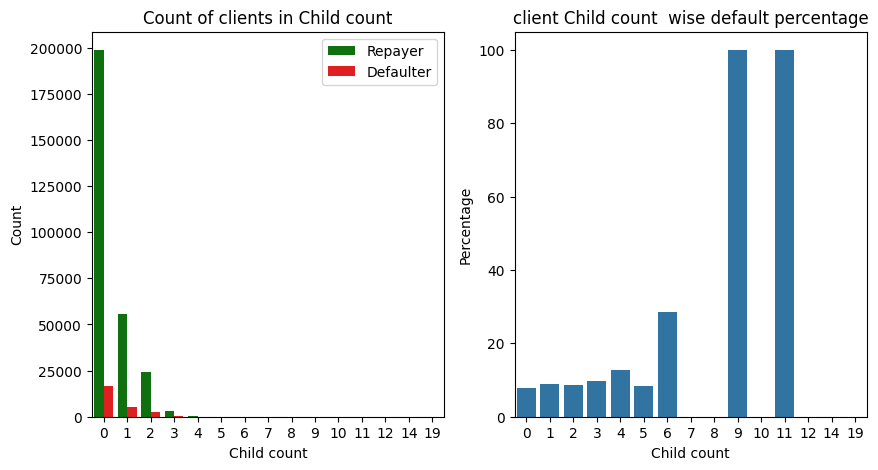

In [90]:
# relation between client child count and defaulter
# percenatge of default in each client child count
child_prec = rmv_app_df[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).mean()
child_prec['TARGET'] = child_prec['TARGET']*100
child_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each client child count
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='CNT_CHILDREN', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in Child count')
plt.xlabel('Child count')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])


# plot2 for percantage of defaulter in each client child count
plt.subplot(1,2,2)
sns.barplot(data=child_prec, x='CNT_CHILDREN', y='TARGET')
plt.title('client Child count  wise default percentage')
plt.xlabel('Child count')
plt.ylabel('Percentage')


plt.show()

* Most of the applicants do not have children
* Very few clients have more than 3 children.
* Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

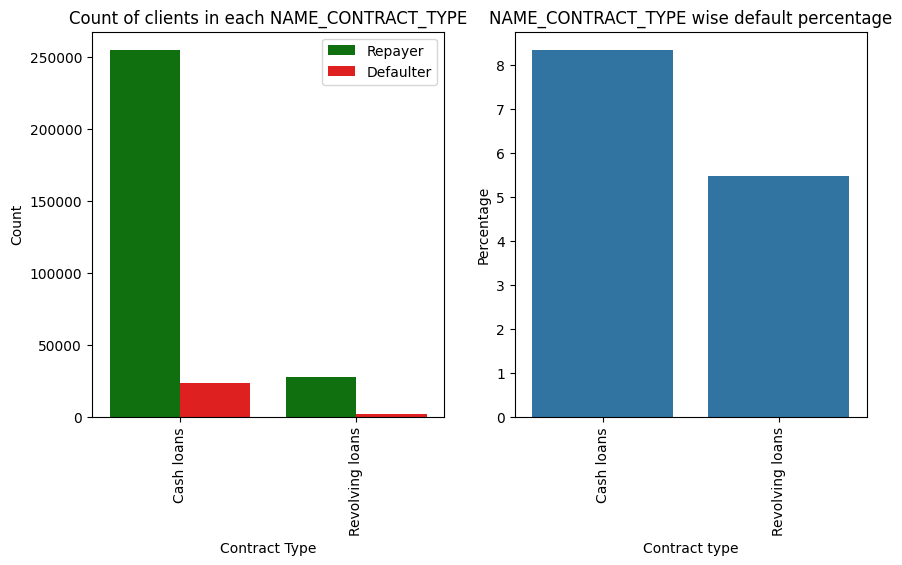

In [91]:
# relation between contract type and defaulter
# percenatge of default in each contract type
ct_prec = rmv_app_df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
ct_prec['TARGET'] = ct_prec['TARGET']*100
ct_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each contract type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=rmv_app_df, x='NAME_CONTRACT_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each NAME_CONTRACT_TYPE')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each contract type
plt.subplot(1,2,2)
sns.barplot(data=ct_prec, x='NAME_CONTRACT_TYPE', y='TARGET')
plt.title('NAME_CONTRACT_TYPE wise default percentage')
plt.xlabel('Contract type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

In [92]:
# merging application and previous application
merge_df = pd.merge(rmv_app_df, rmv_prev_app_df, on='SK_ID_CURR')

# merged df view
merge_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1           Cash loans           M            N               Y             0   
1      100003       0           Cash loans           F            N               N             0   
2      100003       0           Cash loans           F            N               N             0   
3      100003       0           Cash loans           F            N               N             0   
4      100004       0      Revolving loans           M            Y               Y             0   
5      100006       0           Cash loans           F            N               Y             0   
6      100006       0           Cash loans           F            N               Y             0   
7      100006       0           Cash loans           F            N               Y             0   
8      100006       0           Cash loans           F            N               Y             0   
9      100006       0           Cash loans           F            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0          202500.0      406597.5        24700.5           351000.0   Unaccompanied   
1          270000.0     1293502.5        35698.5          1129500.0          Family   
2          270000.0     1293502.5        35698.5          1129500.0          Family   
3          270000.0     1293502.5        35698.5          1129500.0          Family   
4           67500.0      135000.0         6750.0           135000.0   Unaccompanied   
5          135000.0      312682.5        29686.5           297000.0   Unaccompanied   
6          135000.0      312682.5        29686.5           297000.0   Unaccompanied   
7          135000.0      312682.5        29686.5           297000.0   Unaccompanied   
8          135000.0      312682.5        29686.5           297000.0   Unaccompanied   
9          135000.0      312682.5        29686.5           297000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0          Working  Secondary / secondary special  Single / not married  House / apartment   
1    State servant               Higher education               Married  House / apartment   
2    State servant               Higher education               Married  House / apartment   
3    State servant               Higher education               Married  House / apartment   
4          Working  Secondary / secondary special  Single / not married  House / apartment   
5          Working  Secondary / secondary special        Civil marriage  House / apartment   
6          Working  Secondary / secondary special        Civil marriage  House / apartment   
7          Working  Secondary / secondary special        Civil marriage  House / apartment   
8          Working  Secondary / secondary special        Civil marriage  House / apartment   
9          Working  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801        9461            637             3648.0             2120   
1                    0.003541       16765           1188             1186.0              291   
2                    0.003541       16765           1188             1186.0              291   
3                    0.003541       16765           1188             1186.0              291   
4                    0.010032       19046            225             4260.0             2531   
5                    0.008019       19005           3039             9833.0             2437   
6                    0.008019       19005           3039             9833.0             2437   
7                    0.008019       19005           3039             9833.0             2437   
8                    0.008019     

In [93]:
# merged df shape
merge_df.shape

(1413701, 101)

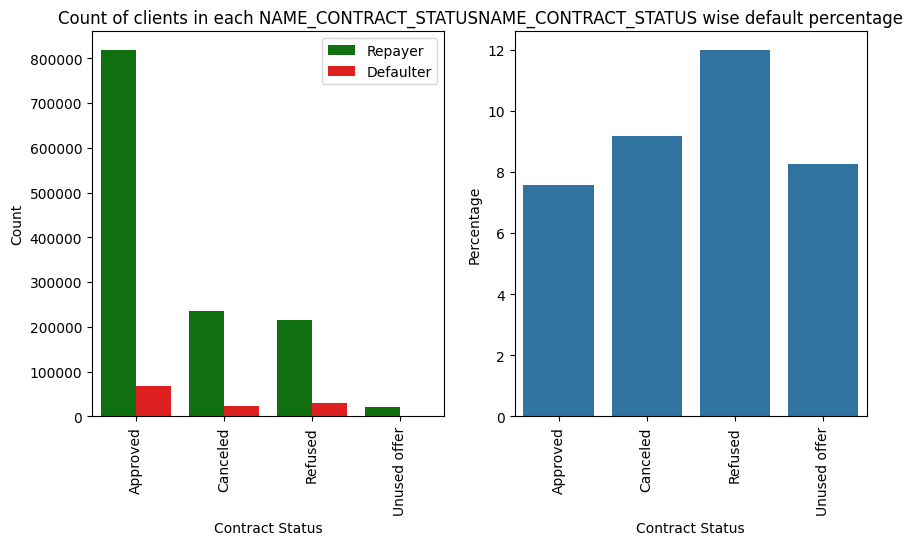

In [94]:
# relation between contract status and defaulter
# percenatge of default in each contract status
cst_prec = merge_df[['NAME_CONTRACT_STATUS', 'TARGET']].groupby(['NAME_CONTRACT_STATUS'],as_index=False).mean()
cst_prec['TARGET'] = cst_prec['TARGET']*100
cst_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each contract status
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=merge_df, x='NAME_CONTRACT_STATUS', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each NAME_CONTRACT_STATUS')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each contract status
plt.subplot(1,2,2)
sns.barplot(data=cst_prec, x='NAME_CONTRACT_STATUS', y='TARGET')
plt.title('NAME_CONTRACT_STATUS wise default percentage')
plt.xlabel('Contract Status')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Most of the clients are from previous application approved.
* Clients from previous application rejected have high default rate.

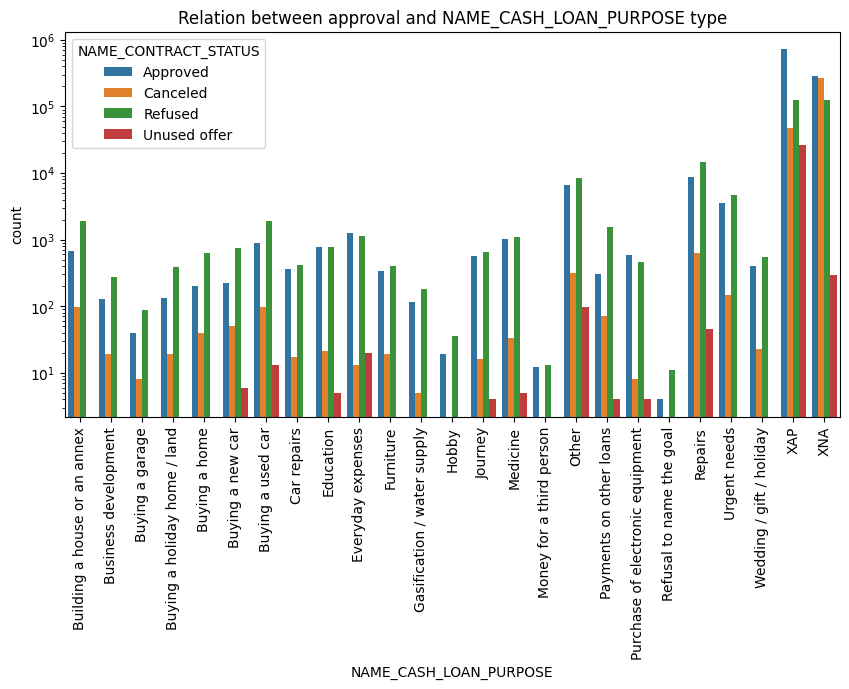

In [95]:
# relation between approval and NAME_CASH_LOAN_PURPOSE type
plt.figure(figsize=(10,5))
sns.countplot(data=rmv_prev_app_df, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
plt.title('Relation between approval and NAME_CASH_LOAN_PURPOSE type')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

* Loan purpose has high number of unknown values (XAP, XNA)
* Loan taken for the purpose of Repairs seems to have highest reject rate
* A very high number application have been rejected by bank or refused by client which has purpose as repair or other.
* This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

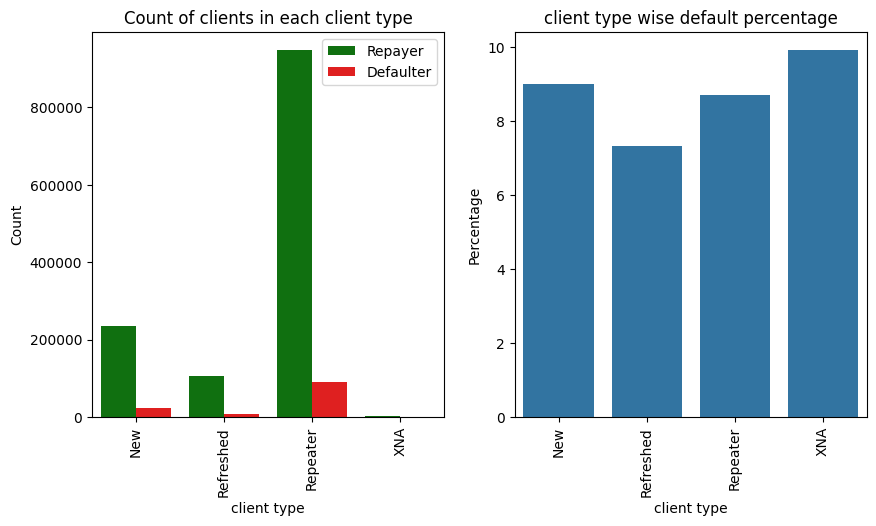

In [96]:
# relation between client type and defaulter
# percenatge of default in each client type
cst_prec = merge_df[['NAME_CLIENT_TYPE', 'TARGET']].groupby(['NAME_CLIENT_TYPE'],as_index=False).mean()
cst_prec['TARGET'] = cst_prec['TARGET']*100
cst_prec.sort_values(by='TARGET', ascending=False, inplace=True)

# plot1 for count of clients in each contract status
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=merge_df, x='NAME_CLIENT_TYPE', hue='TARGET', palette=['g','r'])
plt.title('Count of clients in each client type')
plt.xlabel('client type')
plt.ylabel('Count')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)

# plot2 for percantage of defaulter in each contract status
plt.subplot(1,2,2)
sns.barplot(data=cst_prec, x='NAME_CLIENT_TYPE', y='TARGET')
plt.title('client type wise default percentage')
plt.xlabel('client type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.show()

* Most clients are repeaters, high defaulter rate is from new clients.

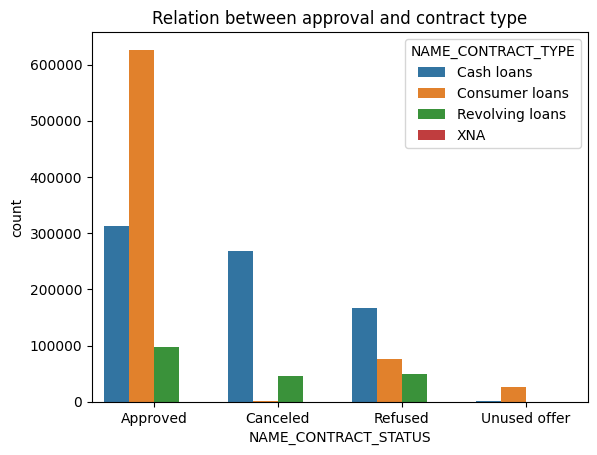

In [97]:
# relation between approval and contract type
sns.countplot(data=rmv_prev_app_df, x='NAME_CONTRACT_STATUS', hue='NAME_CONTRACT_TYPE')
plt.title('Relation between approval and contract type')
plt.show()

* Most of the loan approved are of consumer loans and cash loans type.

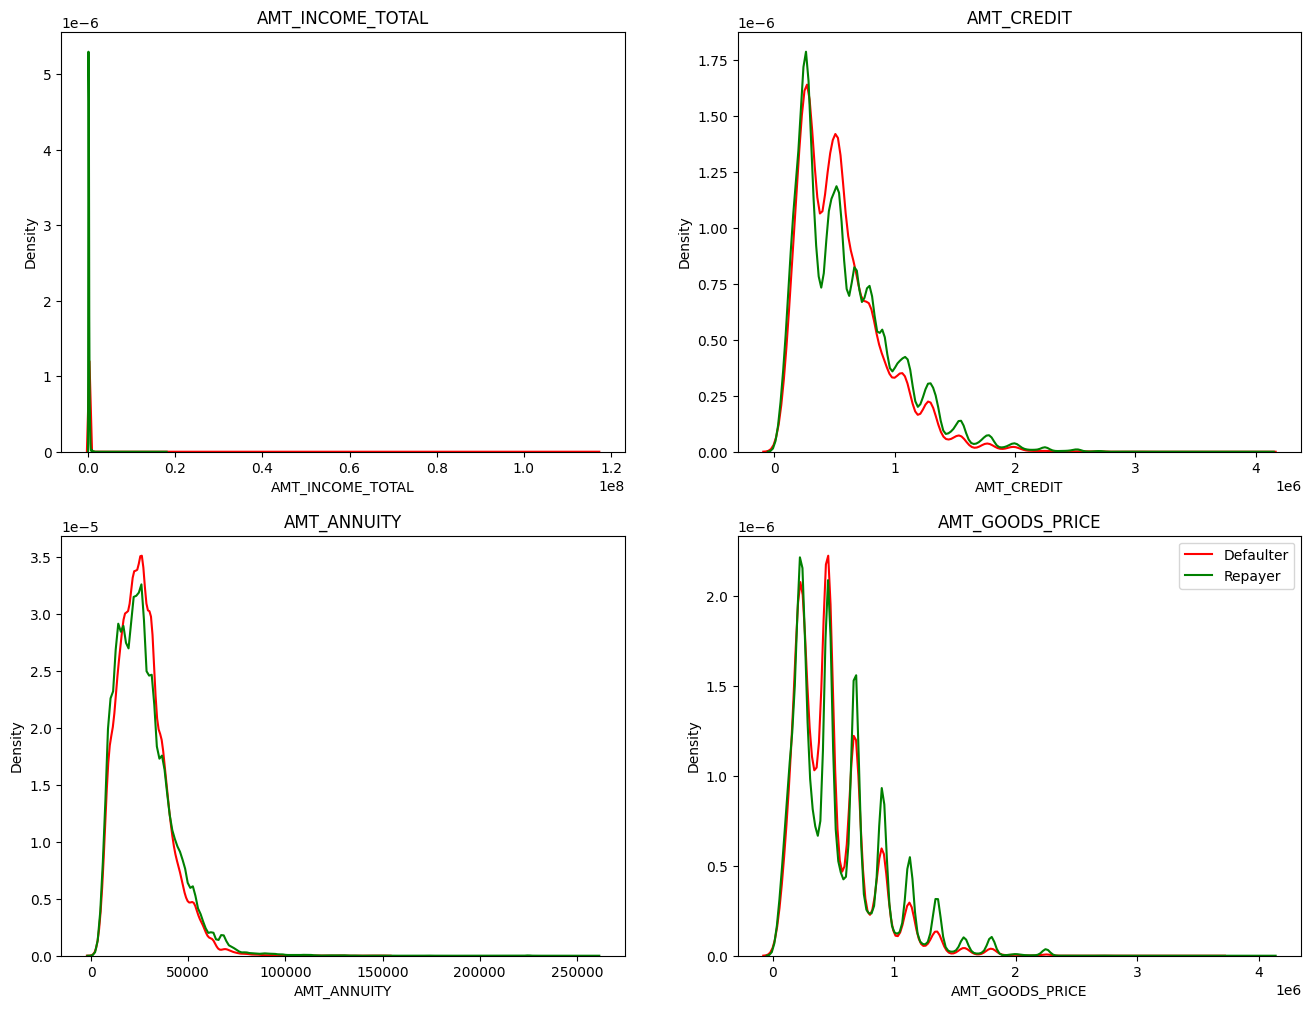

In [98]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = rmv_app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(default_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(nondefault_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1])

plt.legend()
plt.show()

* Most no of loans are given for goods price below 10 lakhs
* Most people pay annuity below 50000 for the credit loan
* Credit amount of the loan is mostly less then 10 lakhs
* The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

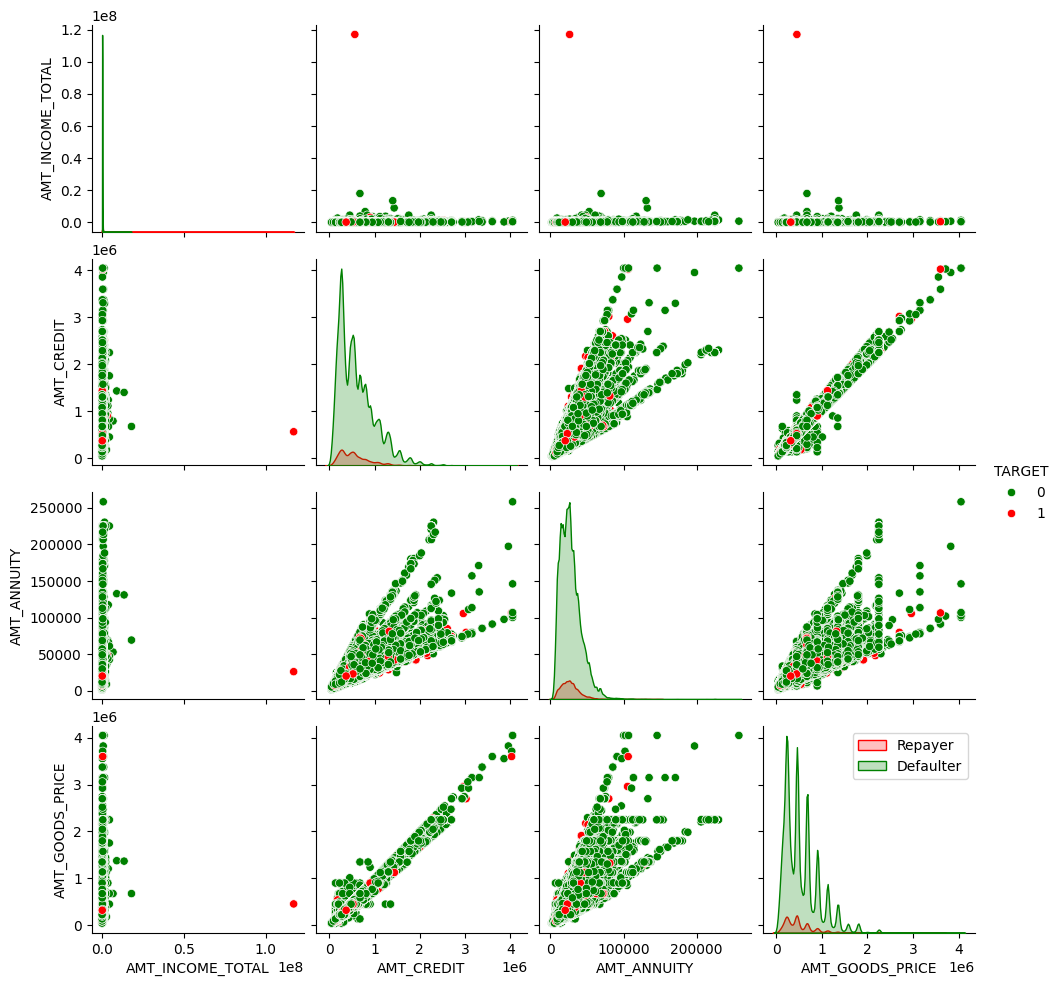

In [99]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = rmv_app_df[['AMT_INCOME_TOTAL','AMT_CREDIT',
                     'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]

sns.pairplot(amount,hue="TARGET",palette=["g","r"])
plt.legend(labels=['Repayer','Defaulter'])
plt.show()

* When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters.
* AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
* There are very less defaulters for AMT_CREDIT >3M
* Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

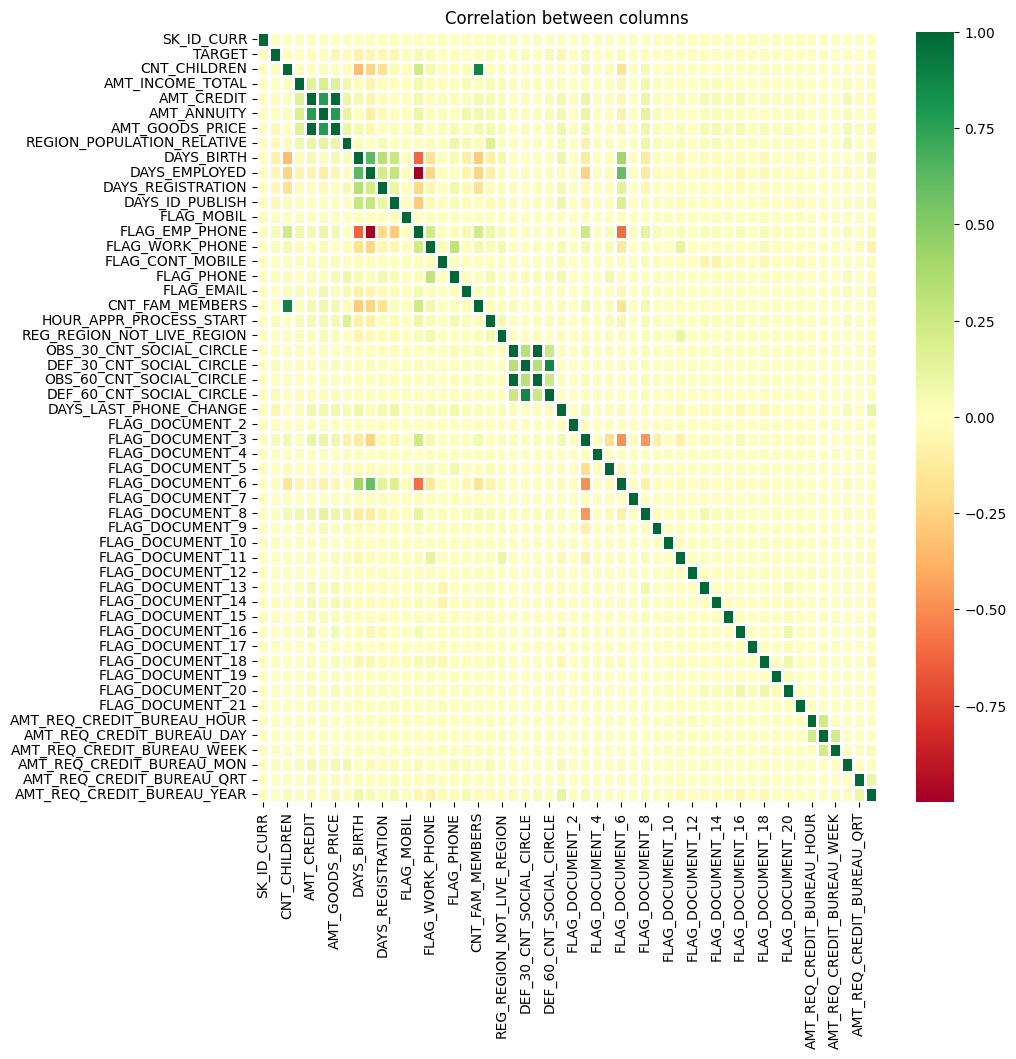

In [100]:
# plotting heatmap for mergeded df for finding correlation
corr_df = rmv_app_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_df, linewidth=1, cmap='RdYlGn')
plt.title('Correlation between columns')
plt.show()

* Above shows that target column is not highly correlated with other columns.
* AMT_CREDIT, AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_ANNUITY are positively correlated among them.
* OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE are positively correlated among them.

### FEATURE SELECTION

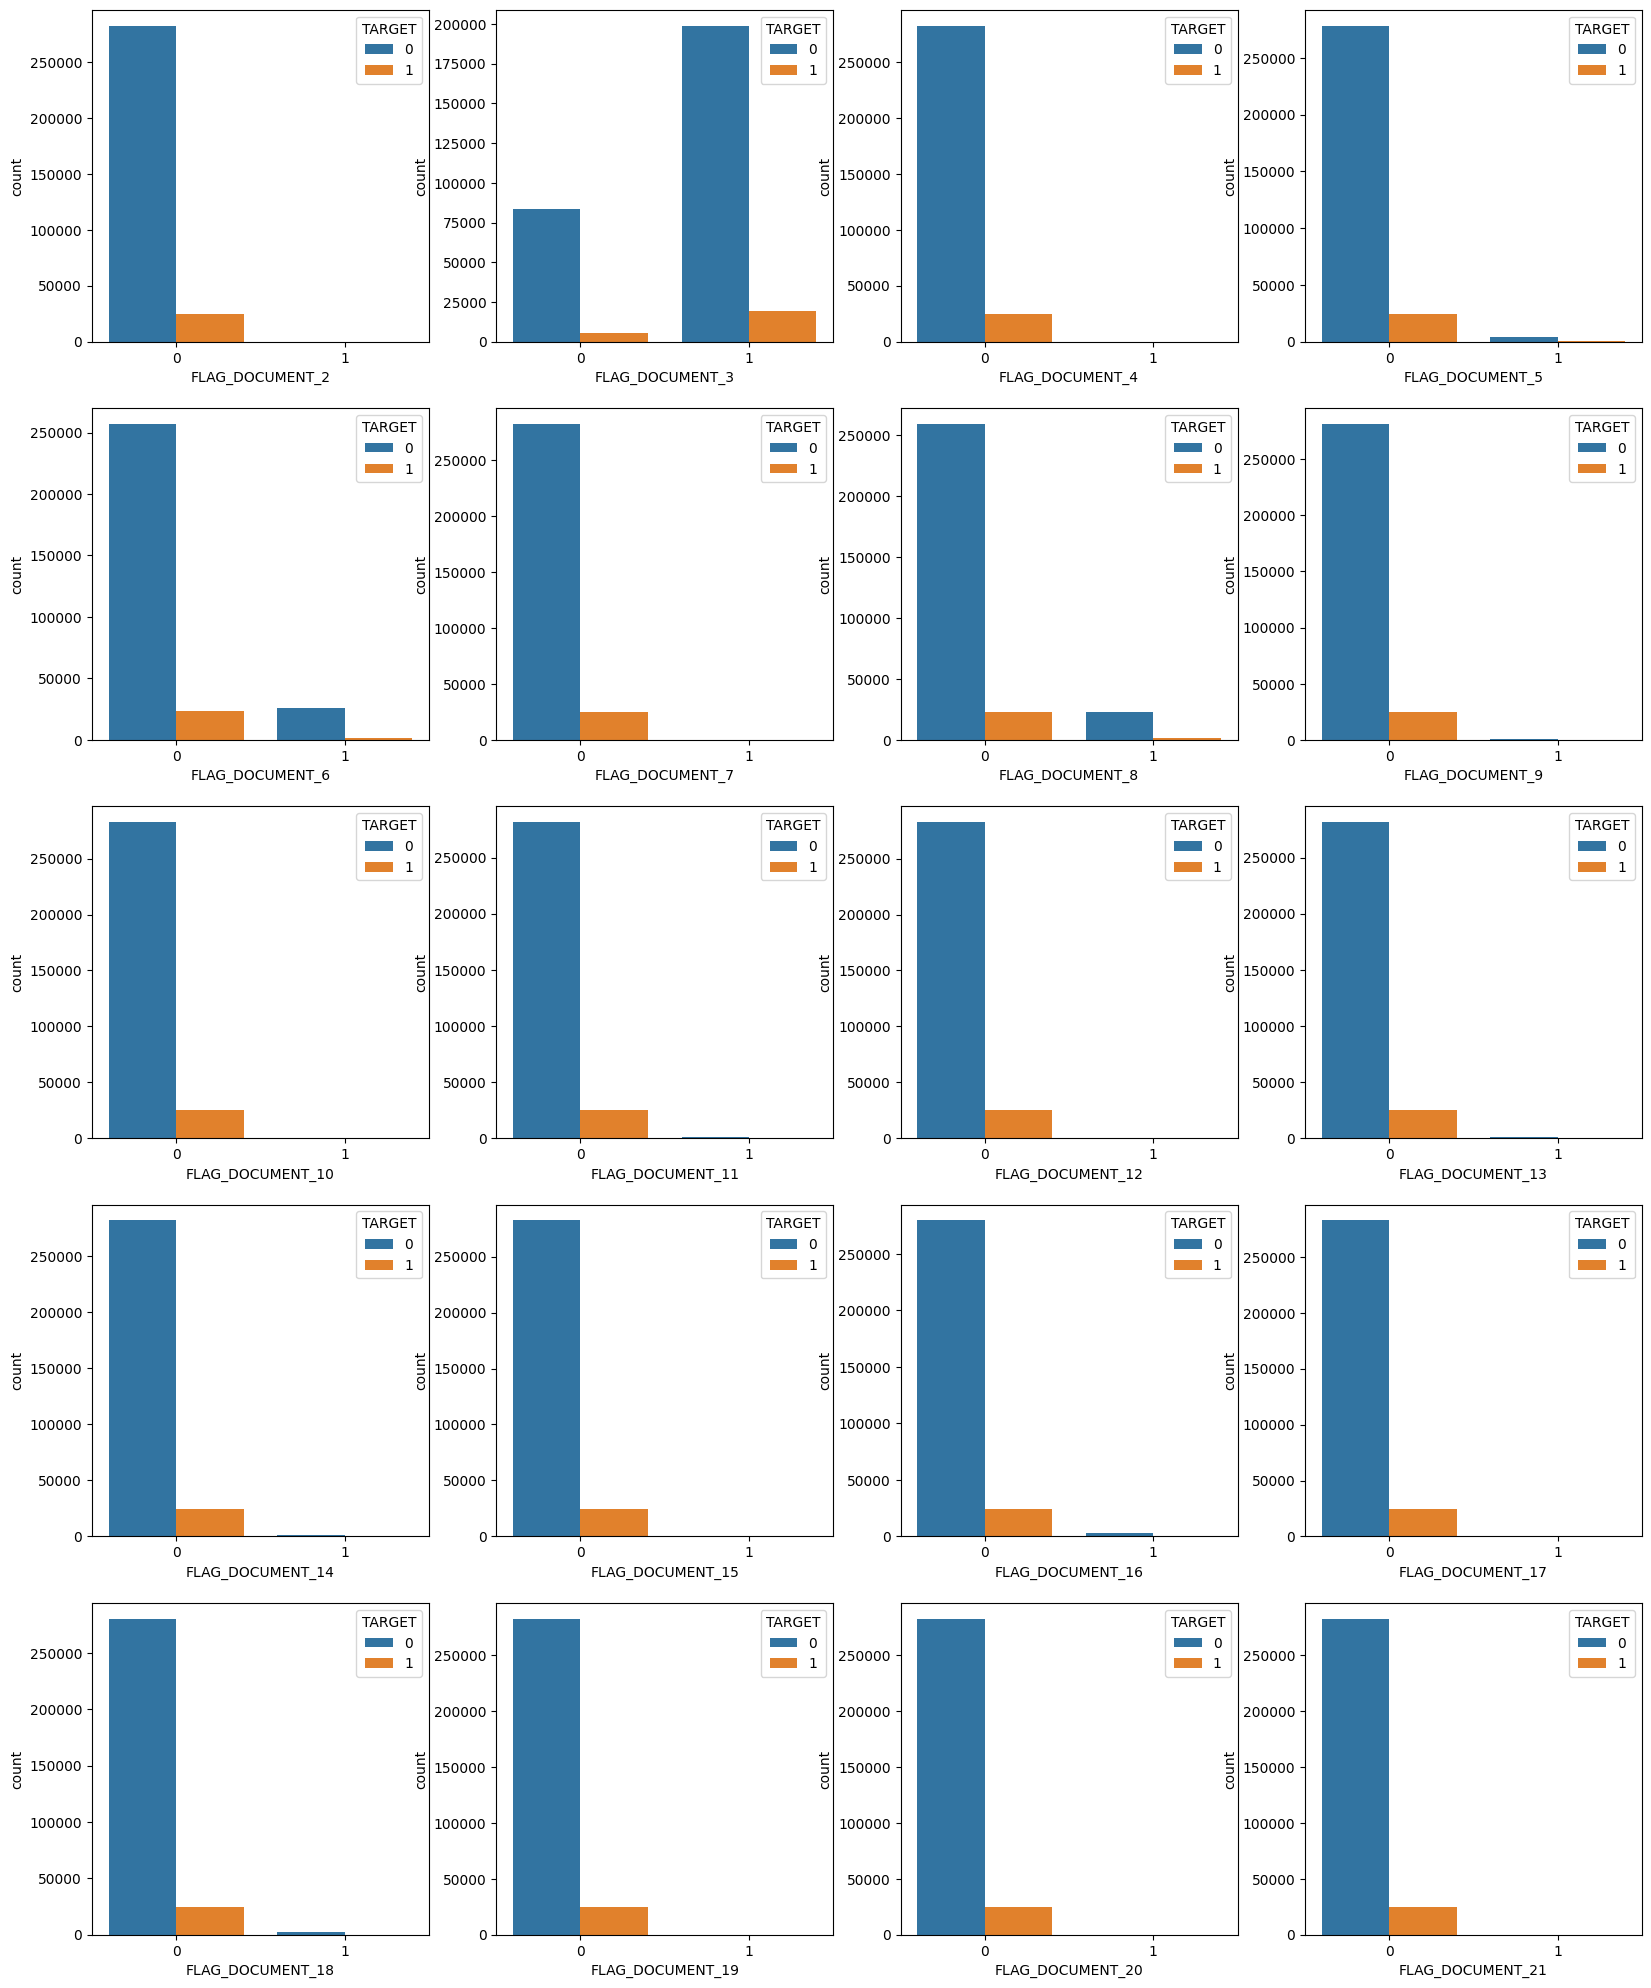

In [101]:
# relation between flag documents and target
# list of flag document
flag_doc = []
for i in rmv_app_df.columns:
    if i.startswith('FLAG_DOCUMENT_'):
        flag_doc.append(i)

plt.figure(figsize=(20,25))
for i, col in enumerate(flag_doc):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=rmv_app_df, x=col, hue='TARGET')
plt.show()

As we can see except document 3 almost every customer didn't sumbit other documents so we are dropping flag documents columns except flag document 3

In [102]:
# dropping flag document columns
flag_doc.remove("FLAG_DOCUMENT_3")
print("Shape before removing flag documents",rmv_app_df.shape)
rmv_app_df.drop(labels=flag_doc, axis=1, inplace = True)
print("Shape after removing flag documents",rmv_app_df.shape)

Shape before removing flag documents (307511, 76)
Shape after removing flag documents (307511, 57)


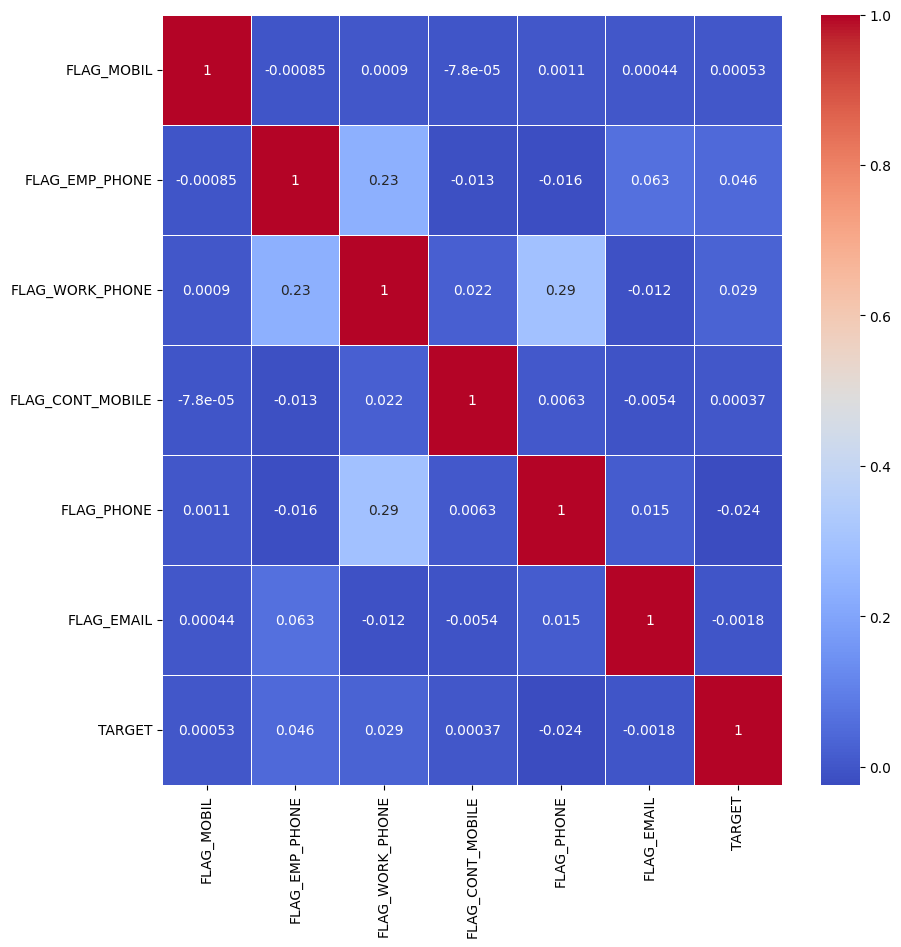

In [103]:
# relation between other flag cloumns
# list of other flag columns
flag_col = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
            'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
            'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

# correlation between flag columns and target
corr = rmv_app_df[flag_col].corr()

# building heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, cmap='coolwarm', linewidth=0.5, annot = True)
plt.show()

Correlation between FLAG_OWN_CAR and FLAG_OWN_REALTY is not showing because its object type column so we are converting it to numerical type.

In [104]:
# converting flag object column (FLAG_OWN_CAR, FLAG_OWN_REALTY) into numerical column for correlation testing
# Y - owns car or realty, N - not owns car or realty
rmv_app_df['FLAG_OWN_CAR'] = rmv_app_df['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
rmv_app_df['FLAG_OWN_REALTY'] = rmv_app_df['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

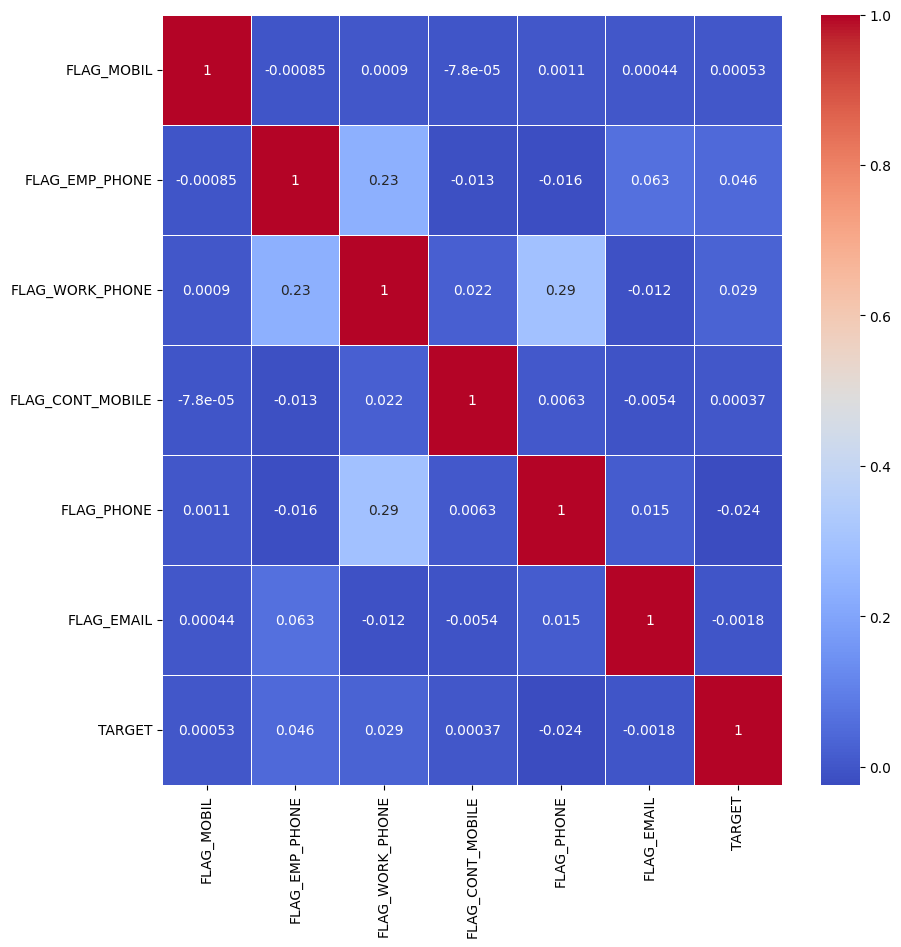

In [105]:
# correlation between flag columns and target
corr1 = rmv_app_df[flag_col].corr()

# building heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=corr1, cmap='coolwarm', linewidth=0.5, annot = True)
plt.show()

The correlation of flag column with target column is less than 0.8 and greater than -0.8 so they are not significant.


In [106]:
# dropping flag columns
flag_col.remove("TARGET")
print("Shape before removing flag columns",rmv_app_df.shape)
rmv_app_df.drop(labels=flag_col, axis=1, inplace = True)
print("Shape after removing flag columns",rmv_app_df.shape)

Shape before removing flag columns (307511, 57)
Shape after removing flag columns (307511, 49)


In [107]:
# merging application and previous apllication dataset
mergedf = pd.merge(rmv_app_df, rmv_prev_app_df, how='inner', on='SK_ID_CURR')
mergedf.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1           Cash loans           M             0          202500.0   
1      100003       0           Cash loans           F             0          270000.0   
2      100003       0           Cash loans           F             0          270000.0   
3      100003       0           Cash loans           F             0          270000.0   
4      100004       0      Revolving loans           M             0           67500.0   
5      100006       0           Cash loans           F             0          135000.0   
6      100006       0           Cash loans           F             0          135000.0   
7      100006       0           Cash loans           F             0          135000.0   
8      100006       0           Cash loans           F             0          135000.0   
9      100006       0           Cash loans           F             0          135000.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      406597.5        24700.5           351000.0   Unaccompanied          Working   
1     1293502.5        35698.5          1129500.0          Family    State servant   
2     1293502.5        35698.5          1129500.0          Family    State servant   
3     1293502.5        35698.5          1129500.0          Family    State servant   
4      135000.0         6750.0           135000.0   Unaccompanied          Working   
5      312682.5        29686.5           297000.0   Unaccompanied          Working   
6      312682.5        29686.5           297000.0   Unaccompanied          Working   
7      312682.5        29686.5           297000.0   Unaccompanied          Working   
8      312682.5        29686.5           297000.0   Unaccompanied          Working   
9      312682.5        29686.5           297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special        Civil marriage  House / apartment   
6  Secondary / secondary special        Civil marriage  House / apartment   
7  Secondary / secondary special        Civil marriage  House / apartment   
8  Secondary / secondary special        Civil marriage  House / apartment   
9  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801        9461            637             3648.0             2120   
1                    0.003541       16765           1188             1186.0              291   
2                    0.003541       16765           1188             1186.0              291   
3                    0.003541       16765           1188             1186.0              291   
4                    0.010032       19046            225             4260.0             2531   
5                    0.008019       19005           3039             9833.0             2437   
6                    0.008019       19005           3039             9833.0             2437   
7                    0.008019       19005           3039             9833.0             2437   
8                    0.008019       19005           3039             9833.0             2437   
9                    0.008019       19005           3039             9833.0             2437   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0        Laborers              1.0                    2                  

In [108]:
# shape of merged df
mergedf.shape

(1413701, 74)

In [109]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
# category columns
category = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE',
            'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE',
            'AGE_GROUP', 'EMPLOYMENT_YEAR_RANGE', 'NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
            'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
            'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

# creating a dummy variables
dummy = pd.get_dummies(mergedf[category], drop_first = True)

In [110]:
# dummy
dummy.head()

NAME_CONTRACT_TYPE_x_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  NAME_TYPE_SUITE_Family  \
0                                     0              1                0                       0   
1                                     0              0                0                       1   
2                                     0              0                0                       1   
3                                     0              0                0                       1   
4                                     1              1                0                       0   

   NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  \
0                                0                        0                        0   
1                                0                        0                        0   
2                                0                        0                        0   
3                                0                        0                        0   
4                                0                        0                        0   

   NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Unaccompanied  \
0                                0                              1   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              1   

   NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Maternity leave  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  \
0                           0                               0                         0   
1                           0                               1                         0   
2                           0                               1                         0   
3                           0                               1                         0   
4                           0                               0                         0   

   NAME_INCOME_TYPE_Unemployed  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  \
0                            0                         1                                     0   
1                            0                         0                                     1   
2                            0                         0                                     1   
3                            0                         0                                     1   
4                            0                         1                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  NAME_FAMILY_STATUS_Married  \
0                                                  1                           0   
1                                                  0                           1   
2                                                  0                           1   
3                                   

In [111]:
# concat dummy with mergedf
mergedf = pd.concat([mergedf, dummy], axis=1)
mergedf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1           Cash loans           M             0          202500.0   
1      100003       0           Cash loans           F             0          270000.0   
2      100003       0           Cash loans           F             0          270000.0   
3      100003       0           Cash loans           F             0          270000.0   
4      100004       0      Revolving loans           M             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      406597.5        24700.5           351000.0   Unaccompanied          Working   
1     1293502.5        35698.5          1129500.0          Family    State servant   
2     1293502.5        35698.5          1129500.0          Family    State servant   
3     1293502.5        35698.5          1129500.0          Family    State servant   
4      135000.0         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801        9461            637             3648.0             2120   
1                    0.003541       16765           1188             1186.0              291   
2                    0.003541       16765           1188             1186.0              291   
3                    0.003541       16765           1188             1186.0              291   
4                    0.010032       19046            225             4260.0             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0        Laborers              1.0                    2                           2   
1      Core staff              2.0                    1                           1   
2      Core staff              2.0                    1                           1   
3      Core staff              2.0                    1                           1   
4        Laborers              1.0                    2                           2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                    WEDNESDAY                         10                           0   
1                       MONDAY                         11                           0   
2                       MONDAY                         11                           0   
3                       MONDAY                         11                           0   
4                       MONDAY                          9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0                          0                           0                      0   
1                          0                           0                      0   
2                          0                           0                      0   
3                          0                           0                      0   
4                          0                           0                      0   

  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                      0                       0  Business Entity Type 3   
1                      0                       0                  School   
2                      0                       0                  School   
3                      0                    

In [112]:
# dropping category columns
mergedf = mergedf.drop(labels=category, axis=1)
mergedf.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0      100002       1             0          202500.0      406597.5        24700.5   
1      100003       0             0          270000.0     1293502.5        35698.5   
2      100003       0             0          270000.0     1293502.5        35698.5   
3      100003       0             0          270000.0     1293502.5        35698.5   
4      100004       0             0           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0           351000.0                    0.018801        9461            637             3648.0   
1          1129500.0                    0.003541       16765           1188             1186.0   
2          1129500.0                    0.003541       16765           1188             1186.0   
3          1129500.0                    0.003541       16765           1188             1186.0   
4           135000.0                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0             2120              1.0                         10                           0   
1              291              2.0                         11                           0   
2              291              2.0                         11                           0   
3              291              2.0                         11                           0   
4             2531              1.0                          9                           0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0                       2.0   
1                       1.0                       0.0                       1.0   
2                       1.0                       0.0                       1.0   
3                       1.0                       0.0                       1.0   
4                       0.0                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                  1134.0                1                         0.0   
1                       0.0                   828.0                1                         0.0   
2                       0.0                   828.0                1                         0.0   
3                       0.0                   828.0                1                         0.0   
4                       0.0                   815.0                0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                         0.0                        0.0   
1                        0.0                         0.0                        0.0   
2                        0.0                         0.0                        0.0   
3                        0.0                         0.0                        0.0   
4                        0.0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_PREV  AMT_ANNUITY_y  \
0                        0.0                         1.0     1038818       9251.775   
1                        0.0                         0.0     1810518      98356.995   
2                        0.0                         0.0     2636178      64567.665   
3                        0.0                         0.0     2396755       6737.310   
4                        0.0                         0.0     1564014       5357.250   

   AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  \
0         179055.0      179055.0           179055.0                          9   
1         900000.0    

In [113]:
# splitting data into X and y
X = mergedf.drop(labels=['TARGET', 'SK_ID_CURR', 'SK_ID_PREV'], axis=1)
y = mergedf['TARGET']


In [115]:
# splitting dat into train test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size = 0.2, random_state= 33)

In [116]:
# random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=7,criterion='entropy',class_weight='balanced', random_state=42)

#fit model
rfc.fit(X_train,y_train)

#predict
y_pred = rfc.predict(X_test)

Accuracy: 0.950842
Precision: 0.973602
Recall: 0.444372
F1 score: 0.610225
ROC AUC: 0.721615
[[257962    295]
 [ 13604  10880]]


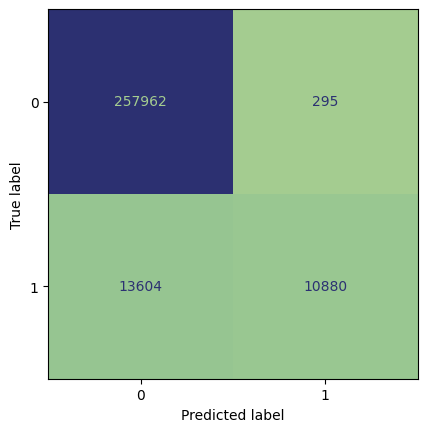

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
# Model Evaluation for random forest classifier
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

#display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest')

## All the analysis
* most of the customers have taken cash loan
* customers who have taken cash loans are less likely to default

**CODE_GENDER**
* most of the loans have been taken by female
* default rate for females are just ~7% which is safer and lesser than male

**NAME_TYPE_SUITE**
* unacompanied people had tanke most of the loans and the default rate is ~8.5% which is still okay

**NAME_INCOME_TYPE**
* the safest segments are working, commercial associates and pensioners

**NAME_EDUCATION_TYPE**
* Higher education is the safest segment to give the loan with a default rate of less than 5%

**NAME_FAMILY_STATUS**
* Married people are safe to target, default rate is 8%

**NAME_HOUSING_TYPE**
* People having house/appartment are safe to give the loan with default rate of ~8%

**OCCUPATION_TYPE**
* Low-Skill Laboreres and drivers are highest defaulters
* Accountants are less defaulters
* Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%

**ORGANIZATION_TYPE**
* Transport type 3 highest defaulter
* Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %

## Univariate numeric variables analysis
* most of the loans were given for the goods price ranging between 0 to 1 ml
* most of the loans were given for the credit amount of 0 to 1 ml
* most of the customers are paying annuity of 0 to 50 K
* mostly the customers have income between 0 to 1 ml

## Bivariate analysis
* AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
* people having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, coudl turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million
* people having children 1 to less than 5 are safer to give the loan
* People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment)

## Analysis on merged data
* for the repairing purpose customers had applied mostly prev. and the same puspose has most number of cancelations
* most of the app. which were prev. either canceled or refused 80-90% of them are repayer in the current data
* offers which were unused prev. now have maximum number of defaulters despite of having high income band customers

# Final Conclusion/Insights

**Bank should target the customers**
* having low income i.e. below 1 ml
* working in Others, Business Entity Type 3, Self Employed  org. type
* working as Accountants, Core staff, Managers and Laborers
* having house/appartment and are married and having children not more than 5
* Highly educated
* preferably female
* unacompanied people can be safer -  default rate is ~8.5%

**Amount segment recommended**
* the credit amount should not be more than 1 ml
* annuity can be made of 50K (depending on the eligibility)
* income bracket could be below 1 ml
* 80-90% of the customer who were prev. canceled/refused, are repayers. Bank can do the analysis and can consider to give loan to these segments

**Precautions**
* org. Transport type 3 should be avoided
* Low-Skill Laboreres and drivers  should be avoided
* offers prev. unused and high income customer should be avoided